# **Optimizing Wind Turbine Fault Detection: Integrating Robust Feature Engineering with Ensemble and Deep Learning Algorithms**

# 1.    Setup & Data Acquisition

## 1.1 Libraries Import

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import glob
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.decomposition import PCA, TruncatedSVD
from mpl_toolkits.mplot3d import Axes3D

## 1.2 Data Loading

In [2]:
dataset_0 = pd.read_csv('/Users/lingyunhuang/Desktop/0091EDA_essay/CARE_To_Compare/Wind Farm A/datasets/0.csv', sep=';', )

In [3]:
dataset_0

time_stamp  asset_id     id  train_test  status_type_id  \
0      2022-08-04 06:10:00         0      0       train               0   
1      2022-08-04 06:20:00         0      1       train               0   
2      2022-08-04 06:30:00         0      2       train               0   
3      2022-08-04 06:40:00         0      3       train               0   
4      2022-08-04 06:50:00         0      4       train               0   
...                    ...       ...    ...         ...             ...   
54981  2023-08-24 05:30:00         0  54981  prediction               3   
54982  2023-08-24 05:40:00         0  54982  prediction               3   
54983  2023-08-24 05:50:00         0  54983  prediction               3   
54984  2023-08-24 06:00:00         0  54984  prediction               3   
54985  2023-08-24 06:10:00         0  54985  prediction               3   

       sensor_0_avg  sensor_1_avg  sensor_2_avg  wind_speed_3_avg  \
0              22.0         302.9         129.4               1.7   
1              22.0         307.1         133.6               1.7   
2              22.0         340.6         167.1               0.9   
3              22.0         124.4         -49.1               1.5   
4              22.0          66.2        -107.3               1.0   
...             ...           ...           ...               ...   
54981          25.0         121.0          24.6               3.3   
54982          25.0         117.2          20.9               2.8   
54983          25.0         114.5          18.2               2.7   
54984          25.0         104.4           8.0               3.1   
54985          25.0         101.8           5.4               3.4   

       wind_speed_4_avg  ...  sensor_47  sensor_48  sensor_49  sensor_50  \
0                   1.7  ...     -496.0        0.0        0.0    -1280.0   
1                   1.7  ...     -490.0        0.0        0.0    -1278.0   
2                   0.9  ...     -490.0        0.0        0.0    -1356.0   
3                   1.5  ...     -509.0        0.0        0.0    -1274.0   
4                   1.0  ...     -499.0        0.0        0.0    -1284.0   
...                 ...  ...        ...        ...        ...        ...   
54981               0.0  ...      -17.0        0.0        0.0     -166.0   
54982               0.0  ...      -17.0        0.0        0.0     -167.0   
54983               0.0  ...      -17.0        0.0        0.0     -166.0   
54984               0.0  ...      -17.0        0.0        0.0     -167.0   
54985               0.0  ...      -17.0        0.0        0.0     -167.0   

       sensor_51  sensor_52_avg  sensor_52_max  sensor_52_min  sensor_52_std  \
0         -496.0            0.0            0.0            0.0            0.0   
1         -490.0            0.0            0.0            0.0            0.0   
2         -490.0            0.0            0.0            0.0            0.0   
3         -509.0            0.0            0.0            0.0            0.0   
4         -499.0            0.0            0.0            0.0            0.0   
...          ...            ...            ...            ...            ...   
54981      -17.0            0.0            0.0            0.0            0.0   
54982      -17.0            0.0            0.0            0.0            0.0   
54983      -17.0            0.0            0.0            0.0            0.0   
54984      -17.0            0.0            0.0            0.0            0.0   
54985      -17.0            0.0            0.0            0.0            0.0   

       sensor_53_avg  
0               26.0  
1               25.0  
2               25.0  
3               26.0  
4               26.0  
...              ...  
54981           24.0  
54982           24.0  
54983           24.0  
54984           24.0  
54985           24.0  

[54986 rows x 86 columns]

In [4]:
base_path = '/Users/lingyunhuang/Desktop/0091EDA_essay/CARE_To_Compare/Wind Farm A'
dataset_path = os.path.join(base_path, 'datasets')
event_info_path = os.path.join(base_path, 'event_info.csv')

In [5]:
all_data_list = []
csv_files = glob.glob(os.path.join(dataset_path, "*.csv"))
print(f"{len(csv_files)} files.")

22 files.


In [6]:
for file in csv_files:
    df_temp = pd.read_csv(file, sep=';')
    name = file.split('/')[-1]
    id = name.split('.')[0]
    df_temp['event_id'] = int(id)
    
    all_data_list.append(df_temp)
big_df = pd.concat(all_data_list)
big_df

time_stamp  asset_id     id  train_test  status_type_id  \
0      2022-07-28 13:20:00        11      0       train               0   
1      2022-07-28 13:30:00        11      1       train               0   
2      2022-07-28 13:40:00        11      2       train               0   
3      2022-07-28 13:50:00        11      3       train               0   
4      2022-07-28 14:00:00        11      4       train               0   
...                    ...       ...    ...         ...             ...   
54739  2023-01-17 23:20:00         0  54739  prediction               0   
54740  2023-01-17 23:30:00         0  54740  prediction               0   
54741  2023-01-17 23:40:00         0  54741  prediction               0   
54742  2023-01-17 23:50:00         0  54742  prediction               0   
54743  2023-01-18 00:00:00         0  54743  prediction               0   

       sensor_0_avg  sensor_1_avg  sensor_2_avg  wind_speed_3_avg  \
0              31.0         152.0          48.7               3.9   
1              31.0          86.1         150.9               6.0   
2              31.0         115.2          69.6               6.3   
3              32.0         129.3         -29.1               6.0   
4              32.0         137.7          26.4               7.1   
...             ...           ...           ...               ...   
54739          12.0         314.6         -24.0               3.4   
54740          12.0         345.5           7.6               4.0   
54741          13.0         343.1          -2.1               4.1   
54742          13.0         331.5         -13.7               3.5   
54743          12.0         342.7          -2.5               2.9   

       wind_speed_4_avg  ...  sensor_48  sensor_49  sensor_50  sensor_51  \
0                   3.9  ...        0.0        0.0    -1185.0    -2090.0   
1                   6.0  ...        0.0        0.0    -1050.0    -1627.0   
2                   6.3  ...        0.0        0.0    -1043.0    -1624.0   
3                   5.9  ...    -9540.0        0.0    40124.0    -9753.0   
4                   6.9  ...   -25215.0        0.0    99360.0   -25215.0   
...                 ...  ...        ...        ...        ...        ...   
54739               3.5  ...     -570.0        0.0     2299.0    -1209.0   
54740               4.0  ...    -7757.0        0.0     9430.0    -7792.0   
54741               4.0  ...   -25888.0        0.0    10201.0   -25888.0   
54742               3.6  ...   -13529.0        0.0     4231.0   -13549.0   
54743               2.9  ...        0.0        0.0    -1590.0    -1758.0   

       sensor_52_avg  sensor_52_max  sensor_52_min  sensor_52_std  \
0                0.4            2.6            0.0            0.8   
1                0.0            0.0            0.0            0.0   
2                0.0            0.0            0.0            0.0   
3                9.5           14.0            0.0            4.8   
4               13.1           14.9           10.8            1.3   
...              ...            ...            ...            ...   
54739           10.3           11.2            1.9            2.5   
54740            9.3           12.1            2.5            3.4   
54741           11.1           11.1           11.0            0.0   
54742           11.1           11.1           11.0            0.0   
54743            4.1           11.1            1.9            3.5   

       sensor_53_avg  event_id  
0               34.0        68  
1               34.0        68  
2               34.0        68  
3               34.0        68  
4               35.0        68  
...              ...       ...  
54739           15.0        71  
54740           15.0        71  
54741           15.0        71  
54742           15.0        71  
54743           15.0        71  

[1196747 rows x 87 columns]

In [7]:
event_info = pd.read_csv(event_info_path, sep=';')
event_labels = event_info[['event_id', 'event_label', 'event_description']]
event_labels['event_id'] = event_labels['event_id'].astype(int)
print(event_labels.head(3))

   event_id event_label    event_description
0        68     anomaly  Transformer failure
1        22     anomaly      Hydraulic group
2        72     anomaly      Gearbox failure


/var/folders/jj/k27ndf3n34z0bf8kx6q4_fqc0000gn/T/ipykernel_18330/2462733868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_labels['event_id'] = event_labels['event_id'].astype(int)


In [8]:
big_df = pd.merge(big_df, event_labels, on='event_id', how='left')
big_df.head()

time_stamp  asset_id  id train_test  status_type_id  sensor_0_avg  \
0  2022-07-28 13:20:00        11   0      train               0          31.0   
1  2022-07-28 13:30:00        11   1      train               0          31.0   
2  2022-07-28 13:40:00        11   2      train               0          31.0   
3  2022-07-28 13:50:00        11   3      train               0          32.0   
4  2022-07-28 14:00:00        11   4      train               0          32.0   

   sensor_1_avg  sensor_2_avg  wind_speed_3_avg  wind_speed_4_avg  ...  \
0         152.0          48.7               3.9               3.9  ...   
1          86.1         150.9               6.0               6.0  ...   
2         115.2          69.6               6.3               6.3  ...   
3         129.3         -29.1               6.0               5.9  ...   
4         137.7          26.4               7.1               6.9  ...   

   sensor_50  sensor_51  sensor_52_avg  sensor_52_max  sensor_52_min  \
0    -1185.0    -2090.0            0.4            2.6            0.0   
1    -1050.0    -1627.0            0.0            0.0            0.0   
2    -1043.0    -1624.0            0.0            0.0            0.0   
3    40124.0    -9753.0            9.5           14.0            0.0   
4    99360.0   -25215.0           13.1           14.9           10.8   

   sensor_52_std  sensor_53_avg  event_id  event_label    event_description  
0            0.8           34.0        68      anomaly  Transformer failure  
1            0.0           34.0        68      anomaly  Transformer failure  
2            0.0           34.0        68      anomaly  Transformer failure  
3            4.8           34.0        68      anomaly  Transformer failure  
4            1.3           35.0        68      anomaly  Transformer failure  

[5 rows x 89 columns]

## 1.3 Basic Inspection

In [9]:
big_df.head()

time_stamp  asset_id  id train_test  status_type_id  sensor_0_avg  \
0  2022-07-28 13:20:00        11   0      train               0          31.0   
1  2022-07-28 13:30:00        11   1      train               0          31.0   
2  2022-07-28 13:40:00        11   2      train               0          31.0   
3  2022-07-28 13:50:00        11   3      train               0          32.0   
4  2022-07-28 14:00:00        11   4      train               0          32.0   

   sensor_1_avg  sensor_2_avg  wind_speed_3_avg  wind_speed_4_avg  ...  \
0         152.0          48.7               3.9               3.9  ...   
1          86.1         150.9               6.0               6.0  ...   
2         115.2          69.6               6.3               6.3  ...   
3         129.3         -29.1               6.0               5.9  ...   
4         137.7          26.4               7.1               6.9  ...   

   sensor_50  sensor_51  sensor_52_avg  sensor_52_max  sensor_52_min  \
0    -1185.0    -2090.0            0.4            2.6            0.0   
1    -1050.0    -1627.0            0.0            0.0            0.0   
2    -1043.0    -1624.0            0.0            0.0            0.0   
3    40124.0    -9753.0            9.5           14.0            0.0   
4    99360.0   -25215.0           13.1           14.9           10.8   

   sensor_52_std  sensor_53_avg  event_id  event_label    event_description  
0            0.8           34.0        68      anomaly  Transformer failure  
1            0.0           34.0        68      anomaly  Transformer failure  
2            0.0           34.0        68      anomaly  Transformer failure  
3            4.8           34.0        68      anomaly  Transformer failure  
4            1.3           35.0        68      anomaly  Transformer failure  

[5 rows x 89 columns]

In [10]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196747 entries, 0 to 1196746
Data columns (total 89 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   time_stamp             1196747 non-null  object 
 1   asset_id               1196747 non-null  int64  
 2   id                     1196747 non-null  int64  
 3   train_test             1196747 non-null  object 
 4   status_type_id         1196747 non-null  int64  
 5   sensor_0_avg           1196747 non-null  float64
 6   sensor_1_avg           1196747 non-null  float64
 7   sensor_2_avg           1196747 non-null  float64
 8   wind_speed_3_avg       1196747 non-null  float64
 9   wind_speed_4_avg       1196747 non-null  float64
 10  wind_speed_3_max       1196747 non-null  float64
 11  wind_speed_3_min       1196747 non-null  float64
 12  wind_speed_3_std       1196747 non-null  float64
 13  sensor_5_avg           1196747 non-null  float64
 14  sensor_5_max      

In [11]:
big_df.describe()

asset_id            id  status_type_id  sensor_0_avg  sensor_1_avg  \
count  1.196747e+06  1.196747e+06    1.196747e+06  1.196747e+06  1.196747e+06   
mean   1.042951e+01  2.720275e+04    4.582046e-01  1.995072e+01  1.708527e+02   
std    6.796280e+00  1.571098e+04    1.250394e+00  5.555743e+00  9.258916e+01   
min    0.000000e+00  0.000000e+00    0.000000e+00  4.000000e+00  0.000000e+00   
25%    1.000000e+01  1.359900e+04    0.000000e+00  1.600000e+01  9.790000e+01   
50%    1.100000e+01  2.719800e+04    0.000000e+00  1.900000e+01  1.294000e+02   
75%    1.300000e+01  4.079800e+04    0.000000e+00  2.400000e+01  2.601000e+02   
max    2.100000e+01  5.615700e+04    4.000000e+00  4.100000e+01  3.590000e+02   

       sensor_2_avg  wind_speed_3_avg  wind_speed_4_avg  wind_speed_3_max  \
count  1.196747e+06      1.196747e+06      1.196747e+06      1.196747e+06   
mean   1.270151e-01      6.201962e+00      6.151001e+00      1.269426e+01   
std    3.276378e+01      3.730365e+00      3.623949e+00      7.420963e+00   
min   -1.800000e+02      4.000000e-01      0.000000e+00      4.000000e-01   
25%   -9.700000e+00      3.200000e+00      3.200000e+00      6.900000e+00   
50%    2.000000e-01      5.500000e+00      5.500000e+00      1.100000e+01   
75%    9.300000e+00      8.500000e+00      8.400000e+00      1.770000e+01   
max    1.800000e+02      2.660000e+01      2.660000e+01      7.000000e+01   

       wind_speed_3_min  ...     sensor_48  sensor_49     sensor_50  \
count      1.196747e+06  ...  1.196747e+06  1196747.0  1.196747e+06   
mean       1.763252e+00  ... -1.588284e+04        0.0  9.304541e+04   
std        1.227410e+00  ...  1.361794e+04        0.0  1.135679e+05   
min        4.000000e-01  ... -9.847500e+04        0.0 -5.367000e+03   
25%        7.000000e-01  ... -2.838500e+04        0.0 -5.610000e+02   
50%        1.500000e+00  ... -1.626300e+04        0.0  3.882700e+04   
75%        2.500000e+00  ...  0.000000e+00        0.0  1.611880e+05   
max        1.460000e+01  ...  1.668060e+05        0.0  3.712560e+05   

          sensor_51  sensor_52_avg  sensor_52_max  sensor_52_min  \
count  1.196747e+06   1.196747e+06   1.196747e+06   1.196747e+06   
mean  -1.627345e+04   9.410091e+00   1.049616e+01   8.237345e+00   
std    1.318826e+04   5.565728e+00   5.759044e+00   5.572132e+00   
min   -9.847500e+04   0.000000e+00   0.000000e+00   0.000000e+00   
25%   -2.838600e+04   2.400000e+00   2.800000e+00   1.700000e+00   
50%   -1.627100e+04   1.140000e+01   1.270000e+01   1.090000e+01   
75%   -1.855000e+03   1.420000e+01   1.490000e+01   1.230000e+01   
max    1.668060e+05   1.490000e+01   1.960000e+01   1.480000e+01   

       sensor_52_std  sensor_53_avg      event_id  
count   1.196747e+06   1.196747e+06  1.196747e+06  
mean    6.089519e-01   2.278092e+01  4.080538e+01  
std     9.986380e-01   5.949853e+00  2.719184e+01  
min     0.000000e+00   6.000000e+00  0.000000e+00  
25%     1.000000e-01   1.800000e+01  1.700000e+01  
50%     3.000000e-01   2.200000e+01  3.800000e+01  
75%     7.000000e-01   2.700000e+01  6.900000e+01  
max     7.400000e+00   4.700000e+01  9.200000e+01  

[8 rows x 85 columns]

You can /CARE_To_Compare/Wind Farm A/event_info.csv and feature_description.csv to know more 

# 2.    Data Preprocessing 

## 2.1 Data Cleaning

### handle missing values

In [12]:
big_df.isnull().sum().sort_values(ascending=False)

event_description        546958
sensor_14_avg                20
sensor_22_avg                20
sensor_31_avg                 0
sensor_35_avg                 0
                          ...  
sensor_17_avg                 0
sensor_16_avg                 0
sensor_15_avg                 0
sensor_13_avg                 0
reactive_power_27_std         0
Length: 89, dtype: int64

sensor_14;average;Temperature in generator bearing 1 (Non-Drive End)
sensor_22;average;Actual phase displacement
since there is few missing values in these columns, we can fill them with mean values
event_description is not necessary for our model, so we can drop it

In [13]:
big_df['sensor_14_avg'].fillna(big_df['sensor_14_avg'].mean(), inplace=True)
big_df['sensor_22_avg'].fillna(big_df['sensor_22_avg'].mean(), inplace=True)
big_df.drop(columns=['event_description'], inplace=True)

In [14]:
big_df.isnull().sum().sort_values(ascending=False)

time_stamp       0
asset_id         0
sensor_35_avg    0
sensor_34_avg    0
sensor_33_avg    0
                ..
sensor_16_avg    0
sensor_15_avg    0
sensor_14_avg    0
sensor_13_avg    0
event_label      0
Length: 88, dtype: int64

### Physics-based Cleaning

From ```big_df.describe()``` we can see ``sensor_49``(Reactive power - generator connected in star) is all 0, could be dropped since it is not useful to the model 

In [15]:
big_df = big_df.drop(columns=['sensor_49'])

## 2.2 Label Engineering

Labeling (Key Step): Detailed description of how "fault samples" are defined (e.g., using Status Codes or maintenance logs to label the 24 hours preceding a fault as 1, and normal operation as 0).

In [16]:
#mapping
mapping = {
    'normal': 0,
    'anomaly': 1
}
big_df['event_label'] = big_df['event_label'].map(mapping)
big_df

time_stamp  asset_id     id  train_test  status_type_id  \
0        2022-07-28 13:20:00        11      0       train               0   
1        2022-07-28 13:30:00        11      1       train               0   
2        2022-07-28 13:40:00        11      2       train               0   
3        2022-07-28 13:50:00        11      3       train               0   
4        2022-07-28 14:00:00        11      4       train               0   
...                      ...       ...    ...         ...             ...   
1196742  2023-01-17 23:20:00         0  54739  prediction               0   
1196743  2023-01-17 23:30:00         0  54740  prediction               0   
1196744  2023-01-17 23:40:00         0  54741  prediction               0   
1196745  2023-01-17 23:50:00         0  54742  prediction               0   
1196746  2023-01-18 00:00:00         0  54743  prediction               0   

         sensor_0_avg  sensor_1_avg  sensor_2_avg  wind_speed_3_avg  \
0                31.0         152.0          48.7               3.9   
1                31.0          86.1         150.9               6.0   
2                31.0         115.2          69.6               6.3   
3                32.0         129.3         -29.1               6.0   
4                32.0         137.7          26.4               7.1   
...               ...           ...           ...               ...   
1196742          12.0         314.6         -24.0               3.4   
1196743          12.0         345.5           7.6               4.0   
1196744          13.0         343.1          -2.1               4.1   
1196745          13.0         331.5         -13.7               3.5   
1196746          12.0         342.7          -2.5               2.9   

         wind_speed_4_avg  ...  sensor_48  sensor_50  sensor_51  \
0                     3.9  ...        0.0    -1185.0    -2090.0   
1                     6.0  ...        0.0    -1050.0    -1627.0   
2                     6.3  ...        0.0    -1043.0    -1624.0   
3                     5.9  ...    -9540.0    40124.0    -9753.0   
4                     6.9  ...   -25215.0    99360.0   -25215.0   
...                   ...  ...        ...        ...        ...   
1196742               3.5  ...     -570.0     2299.0    -1209.0   
1196743               4.0  ...    -7757.0     9430.0    -7792.0   
1196744               4.0  ...   -25888.0    10201.0   -25888.0   
1196745               3.6  ...   -13529.0     4231.0   -13549.0   
1196746               2.9  ...        0.0    -1590.0    -1758.0   

         sensor_52_avg  sensor_52_max  sensor_52_min  sensor_52_std  \
0                  0.4            2.6            0.0            0.8   
1                  0.0            0.0            0.0            0.0   
2                  0.0            0.0            0.0            0.0   
3                  9.5           14.0            0.0            4.8   
4                 13.1           14.9           10.8            1.3   
...                ...            ...            ...            ...   
1196742           10.3           11.2            1.9            2.5   
1196743            9.3           12.1            2.5            3.4   
1196744           11.1           11.1           11.0            0.0   
1196745           11.1           11.1           11.0            0.0   
1196746            4.1           11.1            1.9            3.5   

         sensor_53_avg  event_id  event_label  
0                 34.0        68            1  
1                 34.0        68            1  
2                 34.0        68            1  
3                 34.0        68            1  
4                 35.0        68            1  
...                ...       ...          ...  
1196742           15.0        71            0  
1196743           15.0        71            0  
1196744           15.0        71            0  
1196745           15.0        71            0  
1196746           15.0        71            0  

[1196

In [17]:
big_df.select_dtypes(include=['object']).columns

Index(['time_stamp', 'train_test'], dtype='object')

we dont need id to train our model hence we drop `time_stamp`, `asset_id`, `id`, `status_type_id`, `event_id` , `event_description` columns.
including it would allow the model to trivially classify anomalies without learning the underlying physical precursors (e.g., overheating or vibration patterns) recorded by the sensors.


In [18]:
df = big_df.drop(columns=['time_stamp', 'asset_id', 'id', 'status_type_id', 'event_id'])
df

train_test  sensor_0_avg  sensor_1_avg  sensor_2_avg  \
0             train          31.0         152.0          48.7   
1             train          31.0          86.1         150.9   
2             train          31.0         115.2          69.6   
3             train          32.0         129.3         -29.1   
4             train          32.0         137.7          26.4   
...             ...           ...           ...           ...   
1196742  prediction          12.0         314.6         -24.0   
1196743  prediction          12.0         345.5           7.6   
1196744  prediction          13.0         343.1          -2.1   
1196745  prediction          13.0         331.5         -13.7   
1196746  prediction          12.0         342.7          -2.5   

         wind_speed_3_avg  wind_speed_4_avg  wind_speed_3_max  \
0                     3.9               3.9               8.0   
1                     6.0               6.0               9.9   
2                     6.3               6.3              10.6   
3                     6.0               5.9              12.4   
4                     7.1               6.9              13.7   
...                   ...               ...               ...   
1196742               3.4               3.5               7.7   
1196743               4.0               4.0              17.2   
1196744               4.1               4.0               7.0   
1196745               3.5               3.6               7.3   
1196746               2.9               2.9               6.7   

         wind_speed_3_min  wind_speed_3_std  sensor_5_avg  ...  sensor_47  \
0                     0.6               0.9          70.5  ...    -2090.0   
1                     0.6               1.4          86.0  ...    -1627.0   
2                     0.8               1.3          86.0  ...    -1624.0   
3                     1.7               1.4          13.6  ...     -212.0   
4                     1.7               1.7          -1.9  ...        0.0   
...                   ...               ...           ...  ...        ...   
1196742               0.5               0.8           3.5  ...     -639.0   
1196743               1.4               0.8           4.1  ...      -35.0   
1196744               0.9               0.6          -0.3  ...        0.0   
1196745               0.4               0.7           0.4  ...      -20.0   
1196746               0.4               0.8          20.3  ...    -1758.0   

         sensor_48  sensor_50  sensor_51  sensor_52_avg  sensor_52_max  \
0              0.0    -1185.0    -2090.0            0.4            2.6   
1              0.0    -1050.0    -1627.0            0.0            0.0   
2              0.0    -1043.0    -1624.0            0.0            0.0   
3          -9540.0    40124.0    -9753.0            9.5           14.0   
4         -25215.0    99360.0   -25215.0           13.1           14.9   
...            ...        ...        ...            ...            ...   
1196742     -570.0     2299.0    -1209.0           10.3           11.2   
1196743    -7757.0     9430.0    -7792.0            9.3           12.1   
1196744   -25888.0    10201.0   -25888.0           11.1           11.1   
1196745   -13529.0     4231.0   -13549.0           11.1           11.1   
1196746        0.0    -1590.0    -1758.0            4.1           11.1   

         sensor_52_min  sensor_52_std  sensor_53_avg  event_label  
0                  0.0            0.8           34.0            1  
1                  0.0            0.0           34.0            1  
2                  0.0            0.0           34.0            1  
3                  0.0            4.8           34.0            1  
4                 10.8            1.3           35.0            1  
...                ...            ...            ...          ...  
1196742            1.9            2.5           15.0            0  
1196743            2.5            3.4           15.0            0  
1196744           11.

**Speicial note**: From README, ``train_test``: Strings describing whether the timestamp is part of the prediction data or the training data of the dataset. This is for time-series cross-validation purposes. however our project is aiming to detect anomalies rather than time-series forecasting, so we can drop this column as well. We are going to use ``prediction`` part, which is balanced between normal and anomaly events from Dataset Description.

In [19]:
df = df[df['train_test']=='prediction']
df

train_test  sensor_0_avg  sensor_1_avg  sensor_2_avg  \
52063    prediction          31.0         253.1          -0.4   
52064    prediction          30.0         287.1          18.4   
52065    prediction          30.0         301.6          33.3   
52066    prediction          30.0         259.0          -9.3   
52067    prediction          30.0         295.8          19.8   
...             ...           ...           ...           ...   
1196742  prediction          12.0         314.6         -24.0   
1196743  prediction          12.0         345.5           7.6   
1196744  prediction          13.0         343.1          -2.1   
1196745  prediction          13.0         331.5         -13.7   
1196746  prediction          12.0         342.7          -2.5   

         wind_speed_3_avg  wind_speed_4_avg  wind_speed_3_max  \
52063                 5.6               5.4              10.8   
52064                 5.7               5.6              11.4   
52065                 6.3               6.2              12.4   
52066                 6.3               6.1              13.3   
52067                 5.7               5.6              12.4   
...                   ...               ...               ...   
1196742               3.4               3.5               7.7   
1196743               4.0               4.0              17.2   
1196744               4.1               4.0               7.0   
1196745               3.5               3.6               7.3   
1196746               2.9               2.9               6.7   

         wind_speed_3_min  wind_speed_3_std  sensor_5_avg  ...  sensor_47  \
52063                 2.1               1.0          -1.5  ...        0.0   
52064                 2.1               1.1          -1.5  ...        0.0   
52065                 2.7               1.2          -1.8  ...        0.0   
52066                 2.5               1.0          -1.9  ...        0.0   
52067                 1.5               1.1          -1.6  ...        0.0   
...                   ...               ...           ...  ...        ...   
1196742               0.5               0.8           3.5  ...     -639.0   
1196743               1.4               0.8           4.1  ...      -35.0   
1196744               0.9               0.6          -0.3  ...        0.0   
1196745               0.4               0.7           0.4  ...      -20.0   
1196746               0.4               0.8          20.3  ...    -1758.0   

         sensor_48  sensor_50  sensor_51  sensor_52_avg  sensor_52_max  \
52063     -36200.0    41983.0   -36200.0           11.6           12.9   
52064     -17412.0    45924.0   -17412.0           11.7           13.9   
52065     -18263.0    65606.0   -18263.0           12.4           14.2   
52066     -15416.0    60958.0   -15416.0           12.3           14.0   
52067     -17597.0    47856.0   -17597.0           11.8           13.0   
...            ...        ...        ...            ...            ...   
1196742     -570.0     2299.0    -1209.0           10.3           11.2   
1196743    -7757.0     9430.0    -7792.0            9.3           12.1   
1196744   -25888.0    10201.0   -25888.0           11.1           11.1   
1196745   -13529.0     4231.0   -13549.0           11.1           11.1   
1196746        0.0    -1590.0    -1758.0            4.1           11.1   

         sensor_52_min  sensor_52_std  sensor_53_avg  event_label  
52063             10.9            0.5           36.0            1  
52064             10.9            0.7           35.0            1  
52065             11.0            0.9           35.0            1  
52066             11.2            0.6           35.0            1  
52067             10.9            0.5           35.0            1  
...                ...            ...            ...          ...  
1196742            1.9            2.5           15.0            0  
1196743            2.5            3.4           15.0            0  
1196744           11.

In [20]:
df = df.drop(columns = ['train_test'])
df

sensor_0_avg  sensor_1_avg  sensor_2_avg  wind_speed_3_avg  \
52063            31.0         253.1          -0.4               5.6   
52064            30.0         287.1          18.4               5.7   
52065            30.0         301.6          33.3               6.3   
52066            30.0         259.0          -9.3               6.3   
52067            30.0         295.8          19.8               5.7   
...               ...           ...           ...               ...   
1196742          12.0         314.6         -24.0               3.4   
1196743          12.0         345.5           7.6               4.0   
1196744          13.0         343.1          -2.1               4.1   
1196745          13.0         331.5         -13.7               3.5   
1196746          12.0         342.7          -2.5               2.9   

         wind_speed_4_avg  wind_speed_3_max  wind_speed_3_min  \
52063                 5.4              10.8               2.1   
52064                 5.6              11.4               2.1   
52065                 6.2              12.4               2.7   
52066                 6.1              13.3               2.5   
52067                 5.6              12.4               1.5   
...                   ...               ...               ...   
1196742               3.5               7.7               0.5   
1196743               4.0              17.2               1.4   
1196744               4.0               7.0               0.9   
1196745               3.6               7.3               0.4   
1196746               2.9               6.7               0.4   

         wind_speed_3_std  sensor_5_avg  sensor_5_max  ...  sensor_47  \
52063                 1.0          -1.5          -0.3  ...        0.0   
52064                 1.1          -1.5          -0.4  ...        0.0   
52065                 1.2          -1.8          -0.3  ...        0.0   
52066                 1.0          -1.9          -1.0  ...        0.0   
52067                 1.1          -1.6          -0.2  ...        0.0   
...                   ...           ...           ...  ...        ...   
1196742               0.8           3.5          47.2  ...     -639.0   
1196743               0.8           4.1          24.0  ...      -35.0   
1196744               0.6          -0.3           0.4  ...        0.0   
1196745               0.7           0.4           1.5  ...      -20.0   
1196746               0.8          20.3          46.4  ...    -1758.0   

         sensor_48  sensor_50  sensor_51  sensor_52_avg  sensor_52_max  \
52063     -36200.0    41983.0   -36200.0           11.6           12.9   
52064     -17412.0    45924.0   -17412.0           11.7           13.9   
52065     -18263.0    65606.0   -18263.0           12.4           14.2   
52066     -15416.0    60958.0   -15416.0           12.3           14.0   
52067     -17597.0    47856.0   -17597.0           11.8           13.0   
...            ...        ...        ...            ...            ...   
1196742     -570.0     2299.0    -1209.0           10.3           11.2   
1196743    -7757.0     9430.0    -7792.0            9.3           12.1   
1196744   -25888.0    10201.0   -25888.0           11.1           11.1   
1196745   -13529.0     4231.0   -13549.0           11.1           11.1   
1196746        0.0    -1590.0    -1758.0            4.1           11.1   

         sensor_52_min  sensor_52_std  sensor_53_avg  event_label  
52063             10.9            0.5           36.0            1  
52064             10.9            0.7           35.0            1  
52065             11.0            0.9           35.0            1  
52066             11.2            0.6           35.0            1  
52067             10.9            0.5           35.0            1  
...                ...            ...            ...          ...  
1196742            1.9            2.5           15.0            0  
1196743            2.5            3.4           15.0            0

In [21]:
df['event_label'].value_counts()

event_label
0    26064
1    24529
Name: count, dtype: int64

**This is important! shows that our data is balanced**

## 2.3 Train/Test Split

We do train/test split after data preprocessing to avoid data leakage.

In [22]:
df_feature = df.drop(columns =['event_label'])
df_target = df['event_label']

In [23]:
# 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(
df_feature, df_target, test_size=0.2, random_state=1)

# 3.	Exploratory Data Analysis

## 3.1 Univariate Analysis

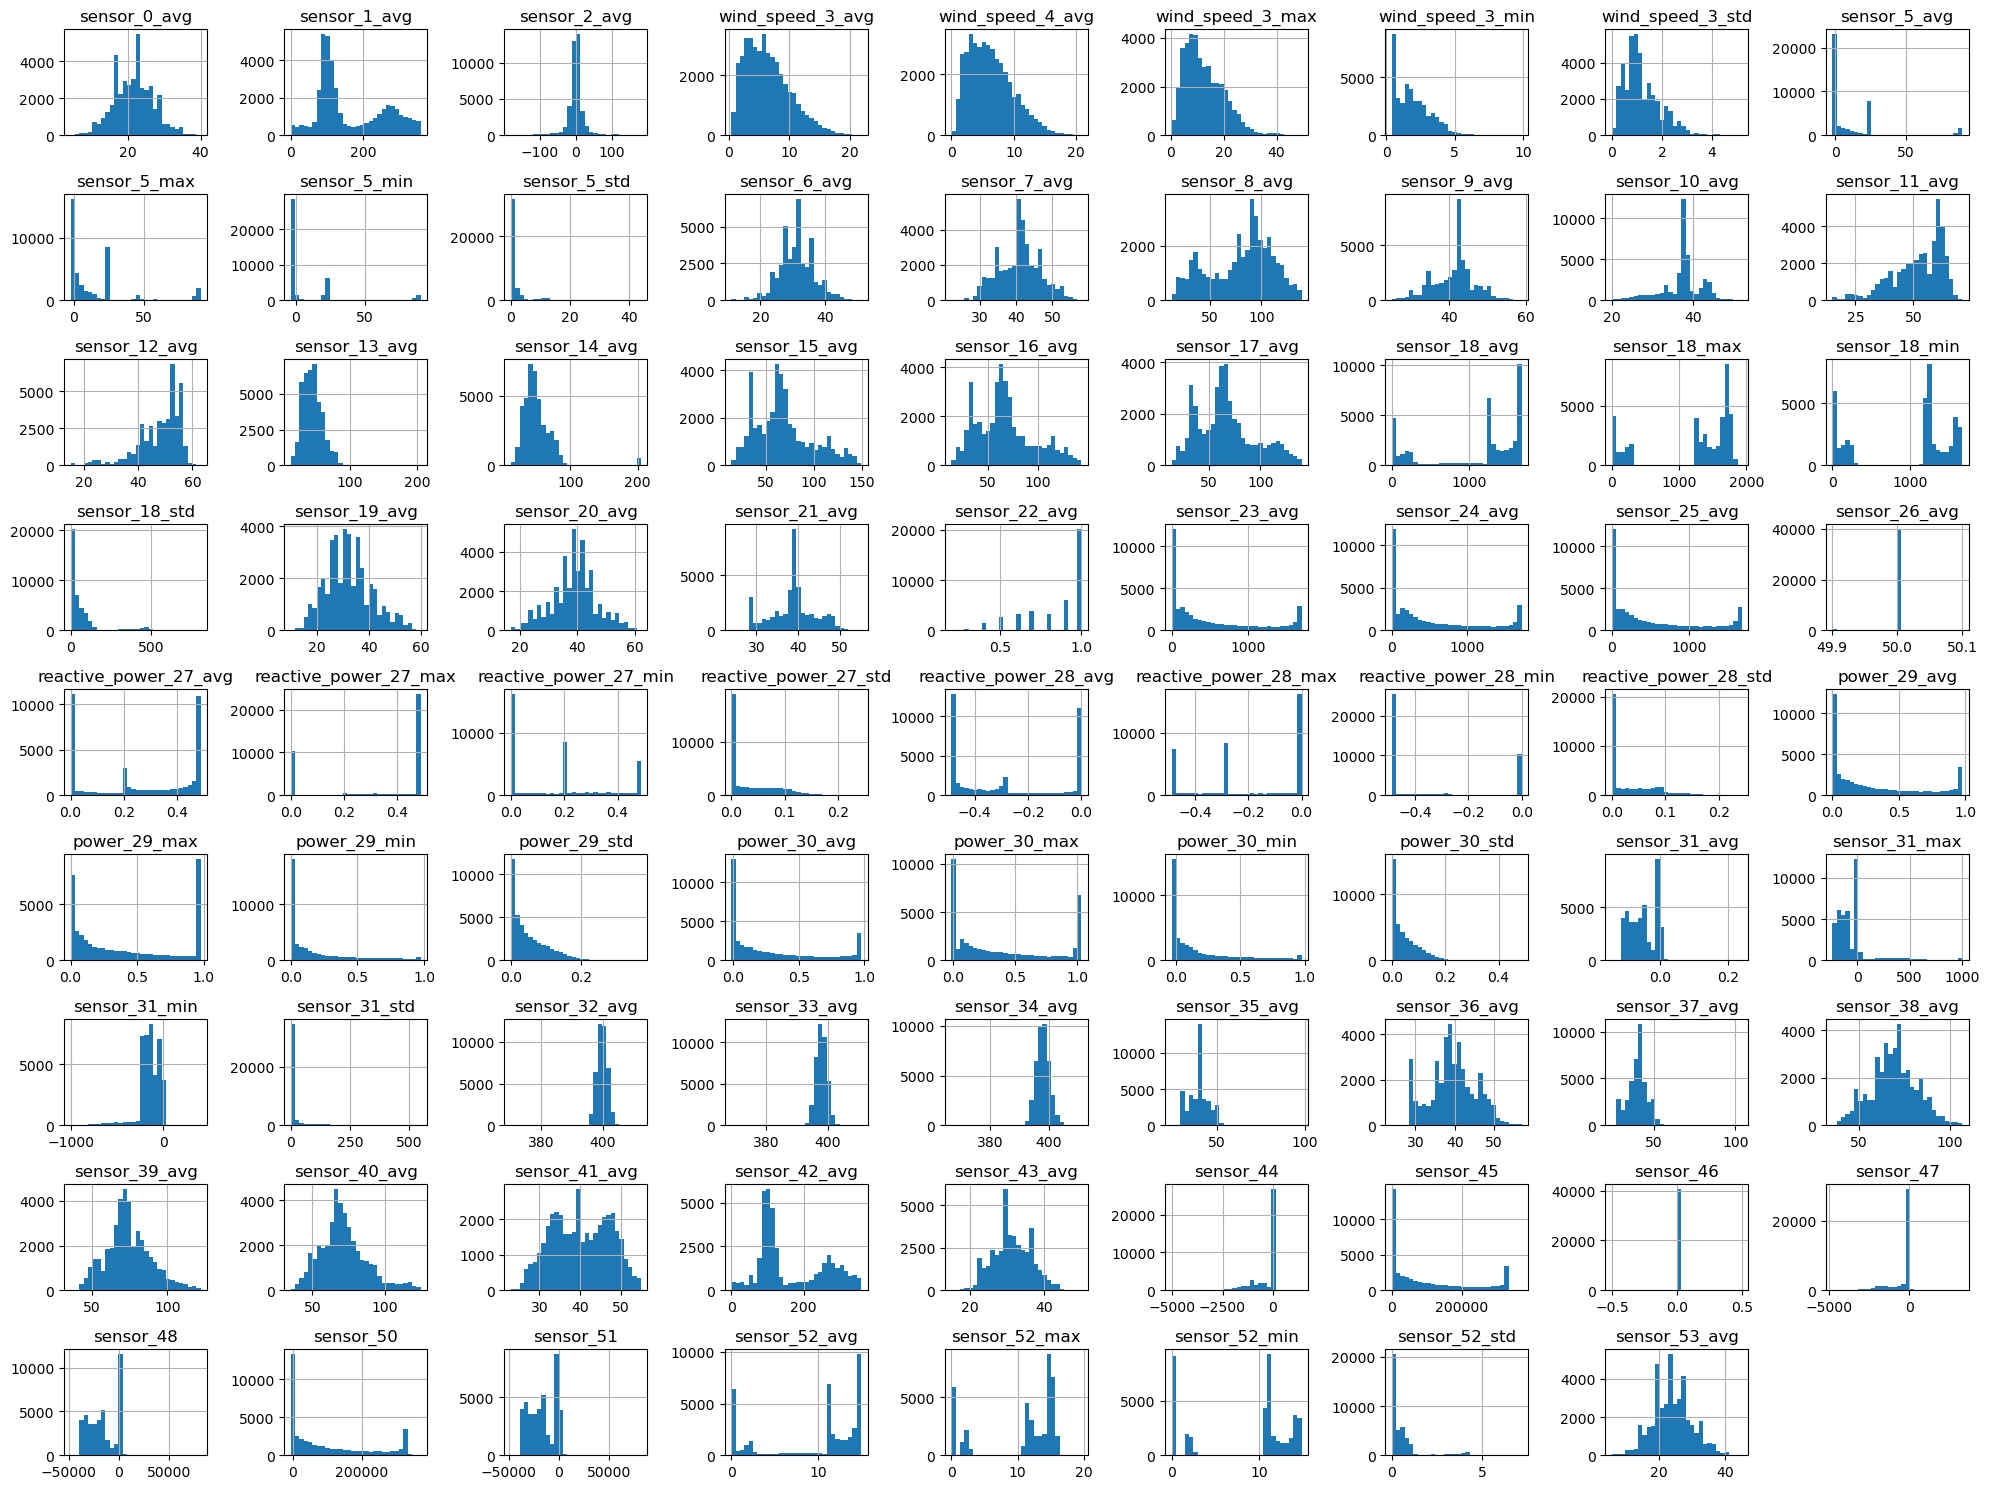

In [24]:
X_train.hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.show()

not gonna use this graph since it is not beatiful enough

And you can see the following code for plotting all features' distribution with different color for different label

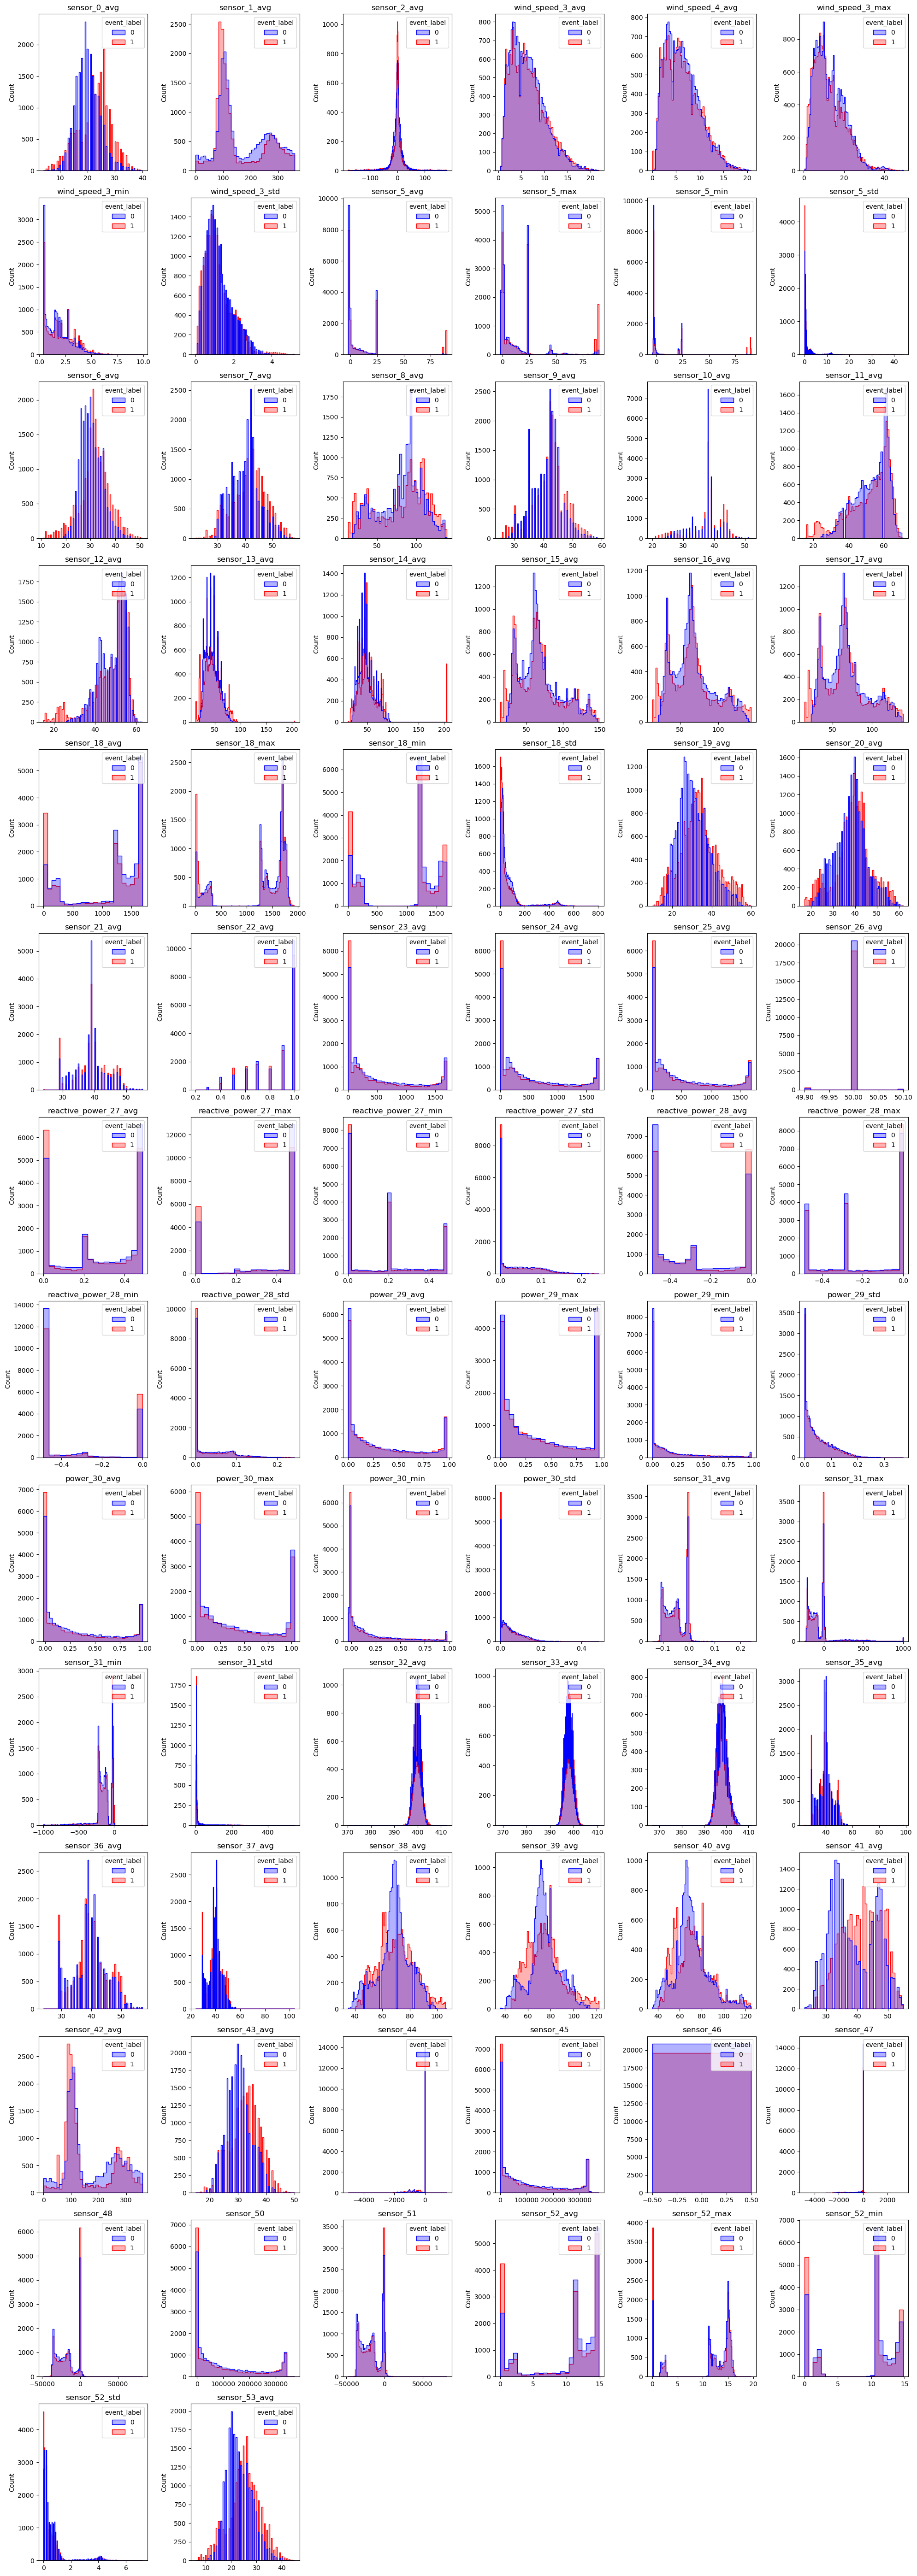

In [25]:
df_plot = X_train.copy()
df_plot['event_label'] = y_train.values

features = X_train.columns
n_features = len(features)
n_cols = 6
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(
        data=df_plot,
        x=col,
        hue='event_label',
        element="step",
        palette={0: "blue", 1: "red"},
        alpha=0.3,
        ax=axes[i]
    )
    axes[i].set_title(col)
    axes[i].set_xlabel("")

for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

HINT: here you can say: some feature is Discrete or binary, even show left-skewed 
Anyway it is not gaussian distribution
So we do Standardization (Z-score normalization) later to make them bell shape(normal distribution)
Interesting stuff: Bimodal Distribution


For Sensor 41 (oil temperature in the hydraulic group):
The left peak (low temperature region) represents the turbine being in idle or standby status, or operating at night / in winter. In this state, the hydraulic system is barely working, and the oil temperature stays close to ambient.
The right peak (high temperature region) corresponds to the turbine running at full load. The hydraulic system is active, so the oil temperature rises and stabilizes at a higher level.


/var/folders/jj/k27ndf3n34z0bf8kx6q4_fqc0000gn/T/ipykernel_18330/2971615649.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/jj/k27ndf3n34z0bf8kx6q4_fqc0000gn/T/ipykernel_18330/2971615649.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/jj/k27ndf3n34z0bf8kx6q4_fqc0000gn/T/ipykernel_18330/2971615649.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/jj/k27ndf3n34z0bf8kx6q4_fqc0000gn/T/ipykernel_18330/2971615649.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

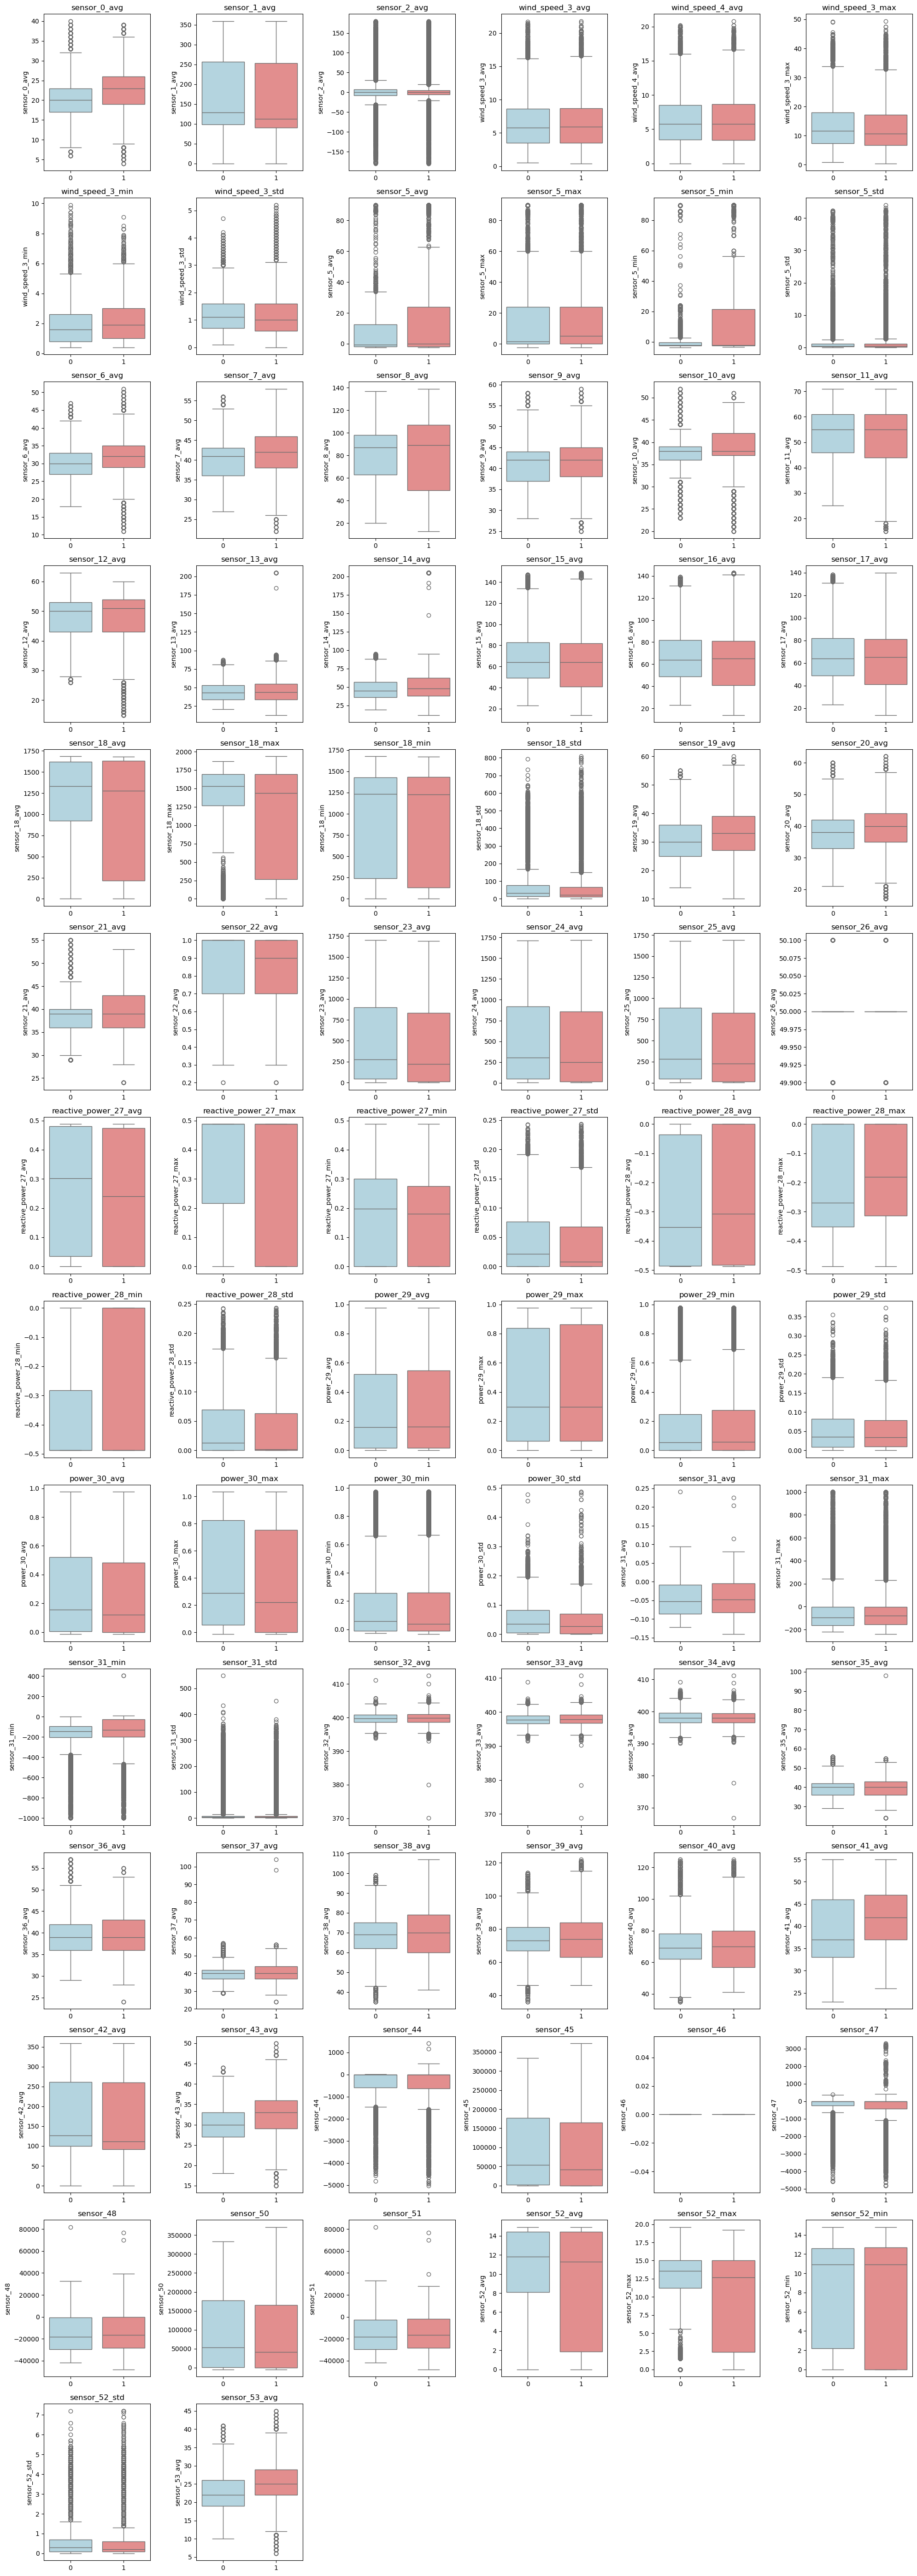

In [26]:
df_plot = X_train.copy()
df_plot['event_label'] = y_train.values.astype(int)

features = X_train.columns
n_features = len(features)
n_cols = 6 
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(
        data=df_plot,
        x='event_label',
        y=col,
        palette=['lightblue', 'lightcoral'],
        ax=axes[i]
    )
    
    axes[i].set_title(col)
    axes[i].set_xlabel("")

for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

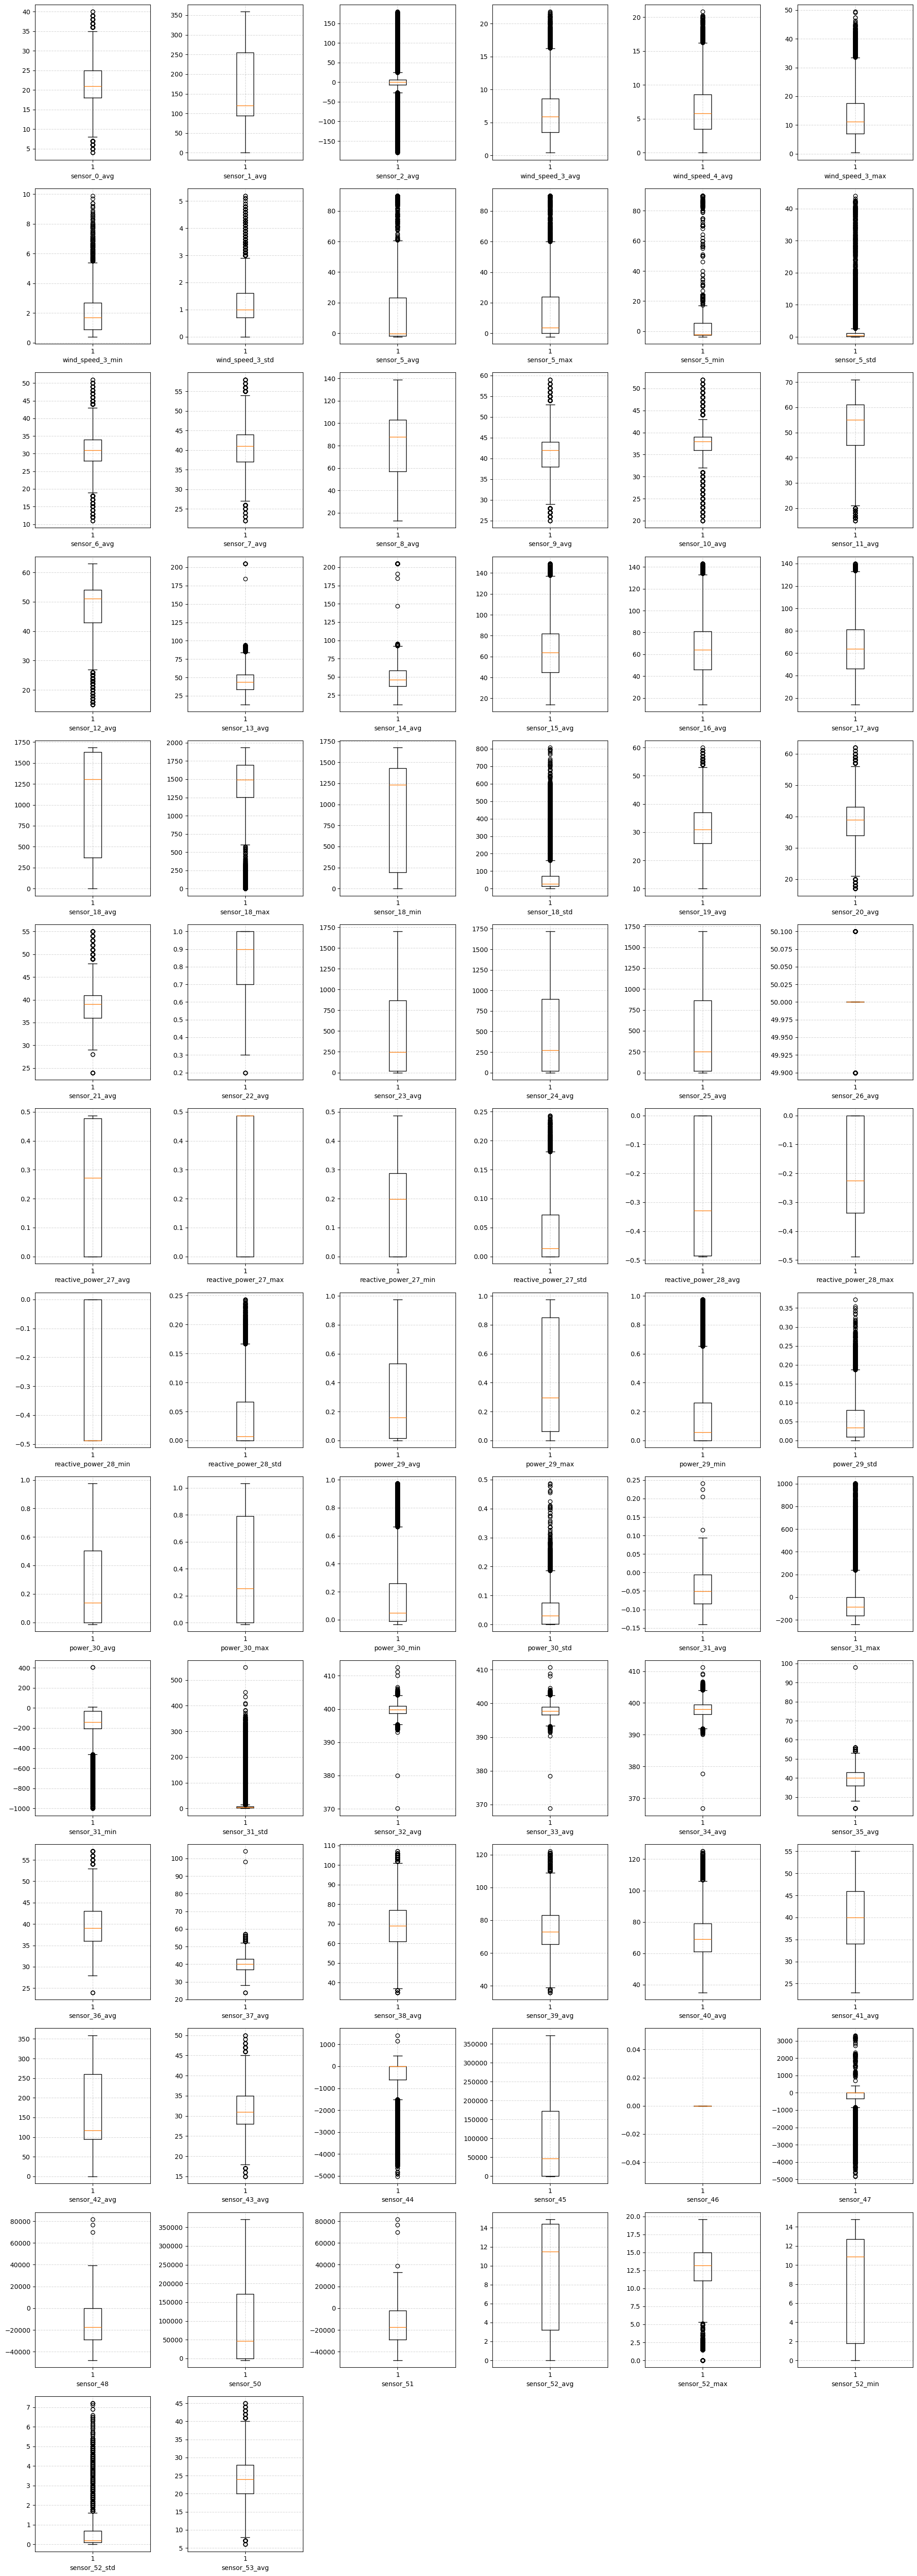

In [27]:
features = X_train.columns
n_features = len(features)
n_cols_per_row = 6
n_rows = math.ceil(n_features / n_cols_per_row)
plt.figure(figsize=(20, 4 * n_rows)) 

col = 1
for i in features:
    if col <= n_features:
        plt.subplot(n_rows, n_cols_per_row, col)
        plt.boxplot(X_train[i])
        plt.xlabel(i)
        plt.grid(True, linestyle='--', alpha=0.5)
        col = col + 1

plt.tight_layout()
plt.show()

From the boxplot we can discover some features have significant outliers, however, these outliers may represent real fault conditions rather than data errors. Therefore we decide to retain them for model training. If you compared boxplots between normal and fault samples, you may find that fault samples often exhibit more extreme values, which could be crucial for accurate fault detection.

## 3.2 Multivariate Analysis

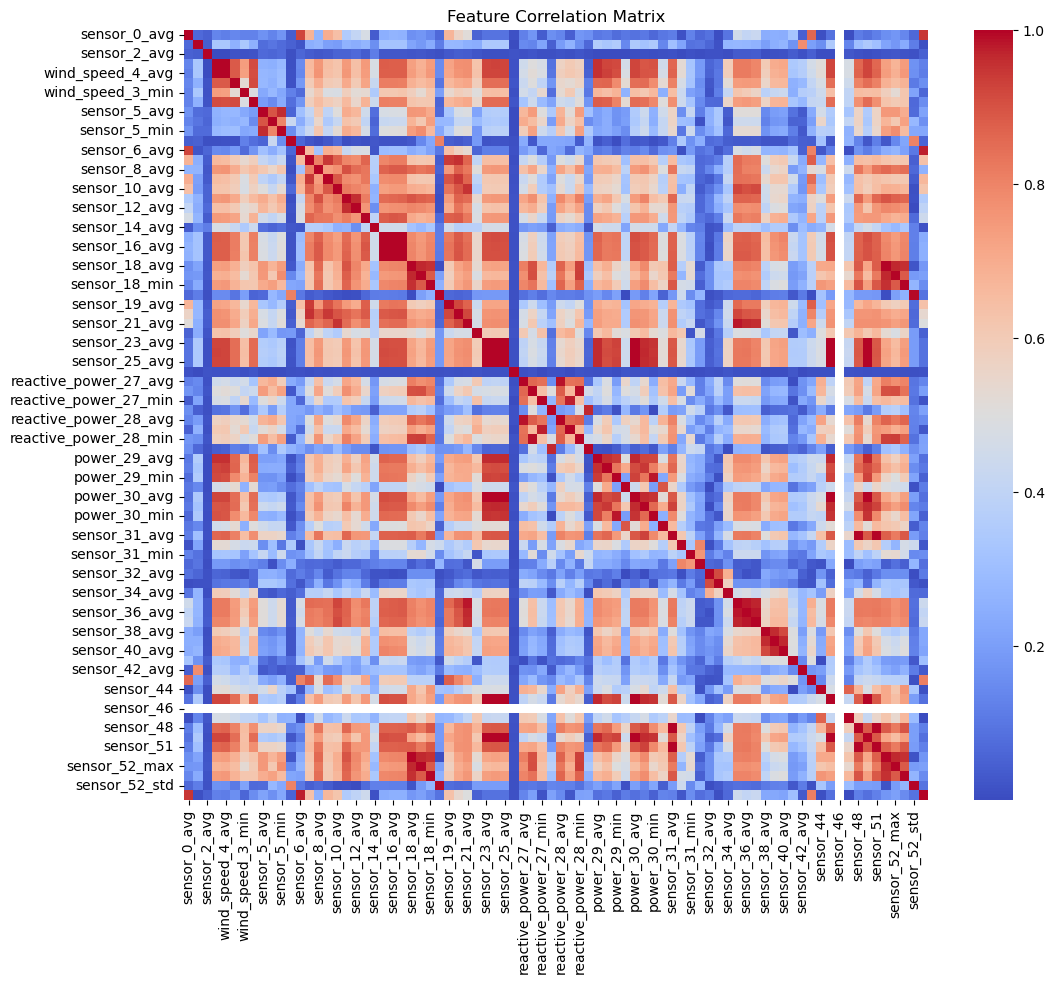

In [28]:
df_corr_calc = X_train.copy()

corr_matrix = df_corr_calc.corr().abs()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

We can see some features are highly correlated, we may consider dropping some of them to reduce redundancy and improve model performance. We will do that in 4. Feature Engineering.

# 4.	Feature Engineering

## 4.1 Quasi-Constant Feature Removal

### Removal of quasi-constant features, Low variance filter, Dominant category thresholding.

To reduce data dimensionality and noise, we applied a low-variance filter to remove quasi-constant features. Specifically, features were discarded if a single unique value occupied more than 90% of the samples, as these predictors offer limited discriminative power for the model.

In [29]:
threshold = 0.90
cols_to_drop = []

for col in X_train.columns:
    counts = X_train[col].value_counts(normalize=True)
        
    if len(counts) > 0 and counts.iloc[0] > threshold:
        cols_to_drop.append(col)

df_QC_cleaned = X_train.drop(columns=cols_to_drop)

print(f"original features number: {len(X_train.columns)}")
print("dropped features:", cols_to_drop)
print("remain features number:", df_QC_cleaned.shape[1])

original features number: 80
dropped features: ['sensor_26_avg', 'sensor_46']
remain features number: 78


## 4.2 Feature Selection based on Information Value / IV-based Feature Selection

To identify features with significant predictive power, we employed the Information Value (IV) selection method. Continuous features were first discretised into 10 bins using quantile binning. The Weight of Evidence (WoE) and IV were then calculated for each feature to quantify its ability to distinguish between normal and faulty states. Following standard industry practices, features with an IV less than or equal to 0.02 were considered 'useless' for prediction and were subsequently removed from the dataset.

Feature Selection using IV and WoE:We utilized the Information Value (IV) framework to reduce dimensionality. The procedure involved three steps:Discretization: Numeric features were binned into deciles (10 equal-frequency bins) to handle outliers and non-linearities.Calculation: For each bin $i$, the Weight of Evidence ($WoE_i$) was computed as the natural log of the ratio between the distribution of faulty samples and normal samples. The total IV for a feature was obtained by summing the weighted differences: $IV = \sum (Dist_{bad} - Dist_{good}) \times WoE$.Filtering: A threshold of $\tau = 0.02$ was applied. Features satisfying $IV \le 0.02$ were discarded due to weak predictive strength, resulting in a refined feature subset.

In [35]:
iv_df = df_QC_cleaned.copy()
target_col = 'target_temp' 
iv_df[target_col] = y_train.values
iv_list = []

for col in df_QC_cleaned:
    # binning
    iv_df['bin'] = pd.qcut(iv_df[col], q=10, duplicates='drop')
    
    # Good-Bad count
    grouped = iv_df.groupby('bin', observed=False)['target_temp'].agg(['count', 'sum'])
    # bad samples (anormaly, label=1)
    grouped['bad'] = grouped['sum']
    grouped['good'] = grouped['count'] - grouped['sum']
    
    # calculate portion
    dist_good = grouped['good'] / grouped['good'].sum()
    dist_bad = grouped['bad'] / grouped['bad'].sum()
    
    # WoE and IV calculation
    woe = np.log((dist_bad) / (dist_good))
    iv_value = ((dist_bad - dist_good) * woe).sum()
    
    iv_list.append({'Feature': col, 'IV': iv_value})

# result
df_iv_result = pd.DataFrame(iv_list).sort_values(by='IV', ascending=False)

# Print Top 10 strongest features
print("Top 10 strongest features:")
print(df_iv_result.head(10))

# 4. Threshold > 0.02
iv_threshold = 0.02
selected_features = df_iv_result[df_iv_result['IV'] > iv_threshold]['Feature'].tolist()
dropped_features = df_iv_result[df_iv_result['IV'] <= iv_threshold]['Feature'].tolist()

df_IV_cleaned = df_QC_cleaned[selected_features]

print(f"before selecting, features number: {df_QC_cleaned.shape[1]}")
print(f"dropped features number: {len(dropped_features)} (IV <= {iv_threshold})")
print(f"remaining features number: {len(selected_features)}")

Print Top 10 strongest features:
          Feature        IV
0    sensor_0_avg  0.624339
77  sensor_53_avg  0.387556
66  sensor_43_avg  0.385827
64  sensor_41_avg  0.359506
12   sensor_6_avg  0.319111
10   sensor_5_min  0.309498
8    sensor_5_avg  0.243719
62  sensor_39_avg  0.221555
61  sensor_38_avg  0.198462
28  sensor_19_avg  0.187023
before selecting, features number: 78
dropped features number: 16 (IV <= 0.02)
remaining features number: 62


## 4.3 Correlation-Based Multicollinearity Reduction

Multicollinearity Reduction: To mitigate the risk of multicollinearity while preserving predictive power, we implemented a greedy selection strategy based on Information Value (IV).

1. Ranking: All candidate features were ranked in descending order based on their IV scores.

2. Filtering: Starting with the highest-ranked feature (the 'leader'), we calculated the pairwise Pearson correlation coefficients with all subsequent features.

3. Selection: Any feature exhibiting a correlation absolute value greater than 0.6 with the leader was identified as redundant and removed, as the leader possesses superior discriminative power. This iterative process was repeated for the remaining features until the entire set was traversed, resulting in a subset of uncorrelated features with high predictive value.

In [133]:
corr_data = df_IV_cleaned.copy()
corr_matrix = corr_data.corr().abs()
sorted_features = selected_features.copy()
iv_mapping = df_iv_result.set_index('Feature')['IV'].to_dict()

group = []
group_list = []
group_count = 0

for leader in sorted_features:
    if leader in group:
        continue
    
    group_count += 1
    group.append(leader)
    leader_iv = iv_mapping.get(leader, 0)
    group_list.append({
        'Group_id': group_count,
        'Feature': leader,
        'Correlation': 1,
        'IV': leader_iv
        })
    
    print(f"Group {group_count} highest IV: {leader}, IV: {leader_iv:.4f}")
    
    for member in sorted_features:
        if member in group:
            continue

        score = corr_matrix.loc[leader, member]
        if score > 0.6:
            print(f"    strong correlation member: {member} (correlation coefficient: {score:.2f}, IV: {iv_mapping.get(member, 0):.4f})")
            group.append(member)
            member_iv = iv_mapping.get(member, 0)
            group_list.append({
            'Group_id': group_count,
            'Feature': member,
            'Correlation': score,
            'IV': member_iv
            })


Group 1 highest IV: sensor_0_avg, IV: 0.6243
    strong correlation member: sensor_53_avg (correlation coefficient: 0.95, IV: 0.3876)
    strong correlation member: sensor_43_avg (correlation coefficient: 0.86, IV: 0.3858)
    strong correlation member: sensor_6_avg (correlation coefficient: 0.92, IV: 0.3191)
    strong correlation member: sensor_19_avg (correlation coefficient: 0.68, IV: 0.1870)
    strong correlation member: sensor_7_avg (correlation coefficient: 0.68, IV: 0.1709)
    strong correlation member: sensor_10_avg (correlation coefficient: 0.64, IV: 0.1476)
    strong correlation member: sensor_9_avg (correlation coefficient: 0.70, IV: 0.1045)
Group 2 highest IV: sensor_41_avg, IV: 0.3595
Group 3 highest IV: sensor_5_min, IV: 0.3095
    strong correlation member: sensor_5_avg (correlation coefficient: 0.96, IV: 0.2437)
    strong correlation member: sensor_8_avg (correlation coefficient: 0.62, IV: 0.1501)
    strong correlation member: sensor_18_avg (correlation coefficien

In [134]:
pd.DataFrame(group_list)

Group_id                Feature  Correlation        IV
0          1           sensor_0_avg     1.000000  0.624339
1          1          sensor_53_avg     0.949101  0.387556
2          1          sensor_43_avg     0.863273  0.385827
3          1           sensor_6_avg     0.924075  0.319111
4          1          sensor_19_avg     0.675597  0.187023
..       ...                    ...          ...       ...
57        10       wind_speed_3_min     1.000000  0.055827
58        11          sensor_31_min     1.000000  0.055303
59        11          sensor_31_std     0.755302  0.035835
60        12  reactive_power_27_std     1.000000  0.027880
61        13          sensor_31_max     1.000000  0.023701

[62 rows x 4 columns]

Here is introduce that, for example, `sensor_0_avg` is what and `sensor_53_avg` is what, they have high correlation score which will cause linearity issue in logistic regression model. So we only keep `sensor_0_avg` since it has higher IV score.

In [135]:
df_group_list = pd.DataFrame(group_list)
decided_features = df_group_list[df_group_list['Correlation'] == 1].reset_index(drop=True)
decided_features

Group_id                Feature  Correlation        IV
0          1           sensor_0_avg          1.0  0.624339
1          2          sensor_41_avg          1.0  0.359506
2          3           sensor_5_min          1.0  0.309498
3          4          sensor_39_avg          1.0  0.221555
4          5          sensor_42_avg          1.0  0.147032
5          6          sensor_14_avg          1.0  0.107553
6          7           sensor_2_avg          1.0  0.081706
7          8          sensor_18_std          1.0  0.072249
8          9           power_30_std          1.0  0.060456
9         10       wind_speed_3_min          1.0  0.055827
10        11          sensor_31_min          1.0  0.055303
11        12  reactive_power_27_std          1.0  0.027880
12        13          sensor_31_max          1.0  0.023701

In [136]:
df_Corr_cleaned = df_IV_cleaned[decided_features['Feature'].tolist()]
df_Corr_cleaned

sensor_0_avg  sensor_41_avg  sensor_5_min  sensor_39_avg  \
52526            28.0           39.0          -2.3           80.0   
544569           21.0           39.0          -2.7           69.0   
1196712          17.0           31.0          -2.3           72.0   
761900           23.0           39.0          -2.2           75.0   
218049           35.0           47.0          -1.7           78.0   
...               ...            ...           ...            ...   
1196211          11.0           28.0          24.0           71.0   
814655           20.0           46.0          -2.5           70.0   
108474           12.0           44.0          -2.1           68.0   
272125           24.0           50.0          -3.0           67.0   
815147           16.0           48.0          23.9           67.0   

         sensor_42_avg  sensor_14_avg  sensor_2_avg  sensor_18_std  \
52526            304.7           49.0          -0.4           87.6   
544569           106.3           64.0          -2.4           77.4   
1196712          347.0           41.0         -24.4          477.7   
761900           290.3           40.0          -0.8           16.5   
218049            26.5           48.0          -1.3          229.9   
...                ...            ...           ...            ...   
1196211          309.1           32.0         -69.8           11.0   
814655           128.8           49.0           1.9           31.3   
108474           331.1           39.0          -9.8           11.0   
272125           267.1           46.0          33.7          107.1   
815147           343.7           26.0         -23.3           20.3   

         power_30_std  wind_speed_3_min  sensor_31_min  reactive_power_27_std  \
52526        0.058341               1.7         -136.1               0.010439   
544569       0.036634               2.0         -172.0               0.000000   
1196712      0.034927               0.6         -573.8               0.160683   
761900       0.052341               1.3         -108.1               0.170049   
218049       0.032829               0.8         -514.3               0.138293   
...               ...               ...            ...                    ...   
1196211      0.001268               0.8          -23.2               0.000000   
814655       0.116732               3.0         -201.1               0.049366   
108474       0.018244               1.7         -117.5               0.077659   
272125       0.090683               1.1         -113.4               0.080341   
815147       0.001415               0.4          -14.9               0.000000   

         sensor_31_max  
52526           -114.8  
544569          -147.3  
1196712          918.4  
761900             0.3  
218049           424.8  
...                ...  
1196211           -8.0  
814655          -185.4  
108474           -90.6  
272125           -94.4  
815147           -11.5  

[40474 rows x 13 columns]

## 4.4 VIF check

Multicollinearity Check using VIF:
While pairwise correlation analysis removes highly correlated pairs, it fails to detect multicollinearity arising from linear combinations of multiple predictors. To address this, we employed the Variance Inflation Factor (VIF) analysis as a final filter. The VIF for a feature $X_i$ is calculated as $VIF_i = \frac{1}{1 - R_i^2}$, where $R_i^2$ is the coefficient of determination obtained by regressing $X_i$ on all other remaining features.


In [165]:
vif_df = df_Corr_cleaned.copy()
vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [VIF(vif_df.values, i) for i in range(vif_df.shape[1])]

print(vif_data.sort_values('VIF', ascending=False))

                  feature        VIF
3           sensor_39_avg  42.447796
1           sensor_41_avg  40.257701
0            sensor_0_avg  18.151374
5           sensor_14_avg   7.721936
9        wind_speed_3_min   5.822714
10          sensor_31_min   5.443067
4           sensor_42_avg   4.153046
8            power_30_std   3.471400
12          sensor_31_max   3.417115
11  reactive_power_27_std   2.689227
7           sensor_18_std   2.095120
2            sensor_5_min   2.018656
6            sensor_2_avg   1.022370


In [166]:
vif_df = vif_df.drop(columns=['sensor_39_avg'])
vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [VIF(vif_df.values, i) for i in range(vif_df.shape[1])]

print(vif_data.sort_values('VIF', ascending=False))

                  feature        VIF
1           sensor_41_avg  24.721065
0            sensor_0_avg  17.248115
4           sensor_14_avg   7.320729
8        wind_speed_3_min   5.753734
9           sensor_31_min   5.242778
3           sensor_42_avg   4.079111
7            power_30_std   3.457479
11          sensor_31_max   3.293276
10  reactive_power_27_std   2.684753
6           sensor_18_std   2.091593
2            sensor_5_min   2.015077
5            sensor_2_avg   1.022358


In [167]:
vif_df = vif_df.drop(columns=['sensor_41_avg'])
vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [VIF(vif_df.values, i) for i in range(vif_df.shape[1])]

print(vif_data.sort_values('VIF', ascending=False))

                  feature       VIF
0            sensor_0_avg  9.708498
3           sensor_14_avg  7.033550
7        wind_speed_3_min  5.499953
8           sensor_31_min  5.090631
2           sensor_42_avg  3.647745
6            power_30_std  3.449943
10          sensor_31_max  3.179594
9   reactive_power_27_std  2.660406
5           sensor_18_std  2.034245
1            sensor_5_min  1.910877
4            sensor_2_avg  1.021117


Initially, sensor_39_avg and sensor_41_avg exhibited severe multicollinearity with VIF values exceeding 40. We proceeded step-by-step:
First, we removed sensor_39_avg (highest VIF). Re-evaluation showed sensor_41_avg still had a VIF of 24.7.
Consequently, we removed sensor_41_avg.
After this procedure, all remaining features possessed VIF values below the threshold of 10 (or 5, depending on your final result), ensuring the independence of the predictors. Finally, Lasso regression was performed on this refined feature set.

We employed Lasso (Least Absolute Shrinkage and Selection Operator) regression as an embedded feature selection method. Lasso addresses multicollinearity by imposing an L1 regularization penalty on the regression coefficients, effectively shrinking the coefficients of redundant or irrelevant features to exactly zero. This data-driven approach allows the model to handle high-dimensional and collinear data by selecting the most predictive subset of features during the training process, thereby preserving informative variables that might otherwise be removed by manual filtering

## 4.5 standardization

It is important to note that, as Lasso regularization is sensitive to the scale of input variables, all numerical features were standardized (Z-score scaling) prior to the regression analysis.

In [168]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(vif_df), index=vif_df.index, columns=vif_df.columns)
df_scaled.shape

(40474, 11)

In [169]:
df_scaled.var()

sensor_0_avg             1.000025
sensor_5_min             1.000025
sensor_42_avg            1.000025
sensor_14_avg            1.000025
sensor_2_avg             1.000025
sensor_18_std            1.000025
power_30_std             1.000025
wind_speed_3_min         1.000025
sensor_31_min            1.000025
reactive_power_27_std    1.000025
sensor_31_max            1.000025
dtype: float64

## 4.6 LASSO Feature Selection

LassoCV intro

In [224]:
lasso_cv = LassoCV(cv=10, random_state=1) 
lasso_cv.fit(df_scaled, y_train)

LassoCV(cv=10, random_state=1)

In [225]:
coef_series = pd.DataFrame(lasso_cv.coef_, index=df_scaled.columns)
coef_series_sorted_abs = coef_series.sort_values(by=0, key=abs, ascending=False)
coef_series_sorted_abs

0
sensor_0_avg           0.127960
sensor_5_min           0.117860
wind_speed_3_min       0.071828
sensor_14_avg          0.043089
sensor_31_max          0.036649
sensor_31_min          0.027467
sensor_42_avg         -0.015444
power_30_std          -0.012994
sensor_18_std          0.012276
reactive_power_27_std  0.004839
sensor_2_avg          -0.000281

**Noise Removal**: Features with negligible coefficients (e.g., sensor_2_avg, |coef| < 0.001) were pruned to enhance model simplicity without sacrificing accuracy.

In [226]:
final_selected_features = coef_series_sorted_abs[0].index.tolist()
final_selected_features

['sensor_0_avg',
 'sensor_5_min',
 'wind_speed_3_min',
 'sensor_14_avg',
 'sensor_31_max',
 'sensor_31_min',
 'sensor_42_avg',
 'power_30_std',
 'sensor_18_std',
 'reactive_power_27_std',
 'sensor_2_avg']

## 4.7 Final Feature Set 1

The remaining 10 features constitute the optimal subset. We then projected both the training and testing datasets onto this reduced feature space to ensure that the final predictive model focuses solely on the most impactful predictors.

To maintain consistency and prevent data leakage, this specific subset of columns was extracted from both the training set (X_train) and the testing set (X_test). These filtered datasets serve as the input for the subsequent model training and evaluation phases.

In [227]:
X_train_finalset1 = X_train[final_selected_features].copy()
X_test_finalset1 = X_test[final_selected_features].copy()

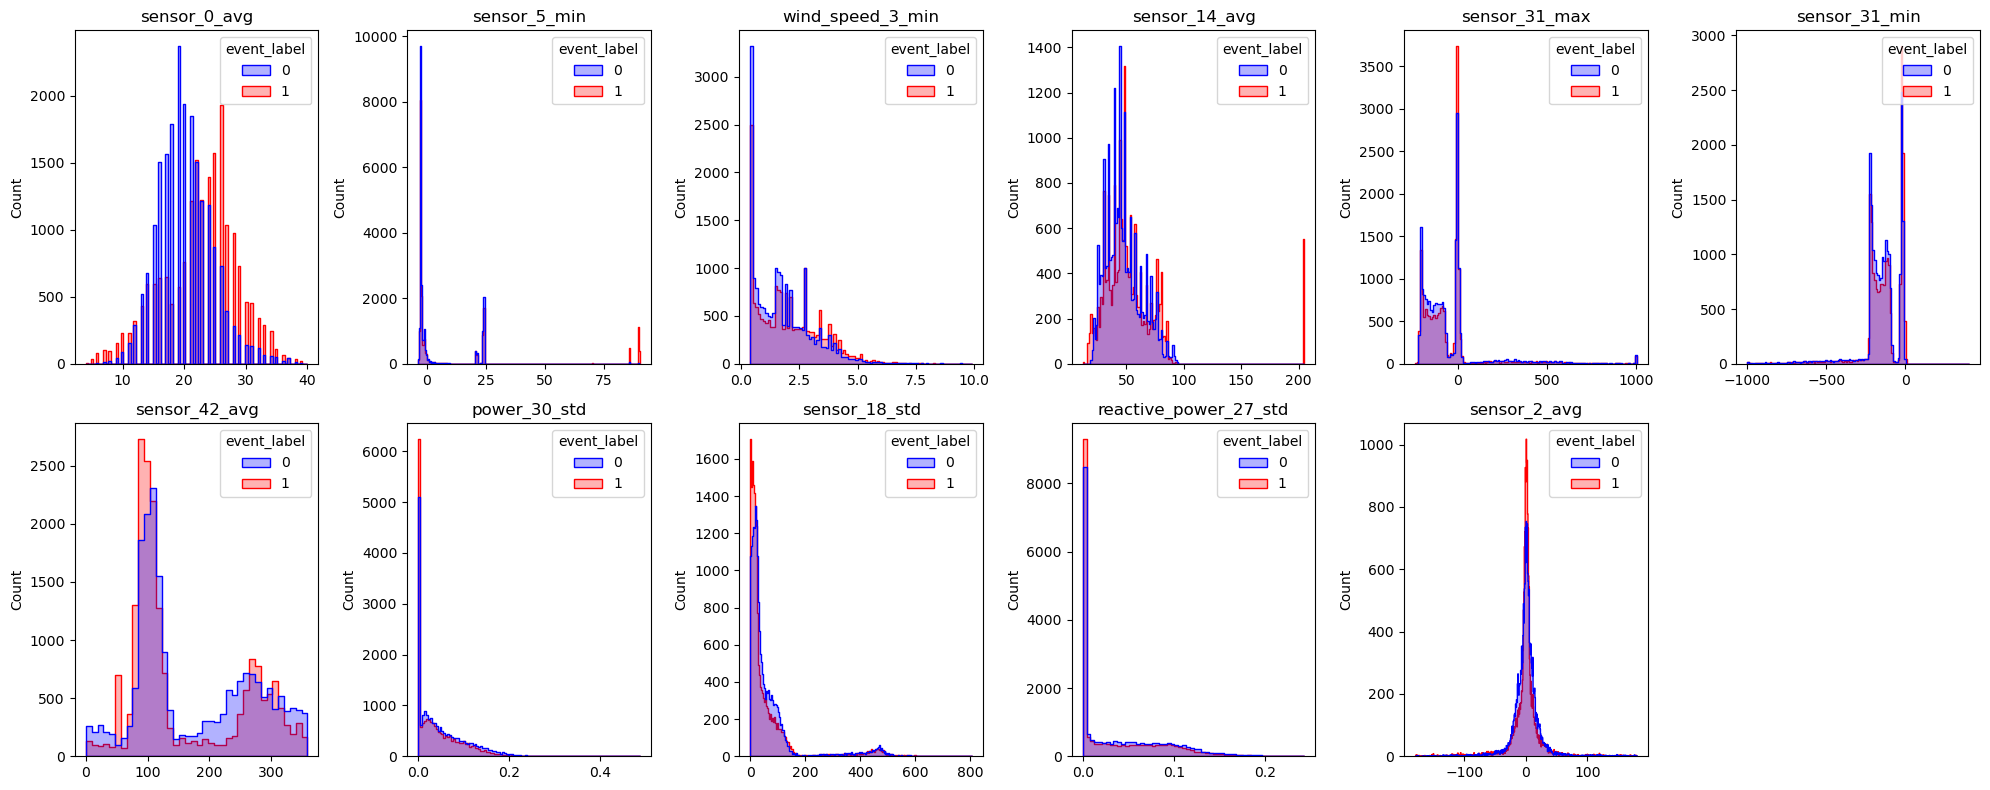

In [229]:
df_plot = X_train_finalset1.copy()
df_plot['event_label'] = y_train.values

features = X_train_finalset1.columns
n_features = len(features)
n_cols = 6
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(
        data=df_plot,
        x=col,
        hue='event_label',
        element="step",
        palette={0: "blue", 1: "red"},
        alpha=0.3,
        ax=axes[i]
    )
    axes[i].set_title(col)
    axes[i].set_xlabel("")

for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

distribution plot after feature engineering shows that the features are more normally distributed, which is beneficial for models like logistic regression that assume normality.

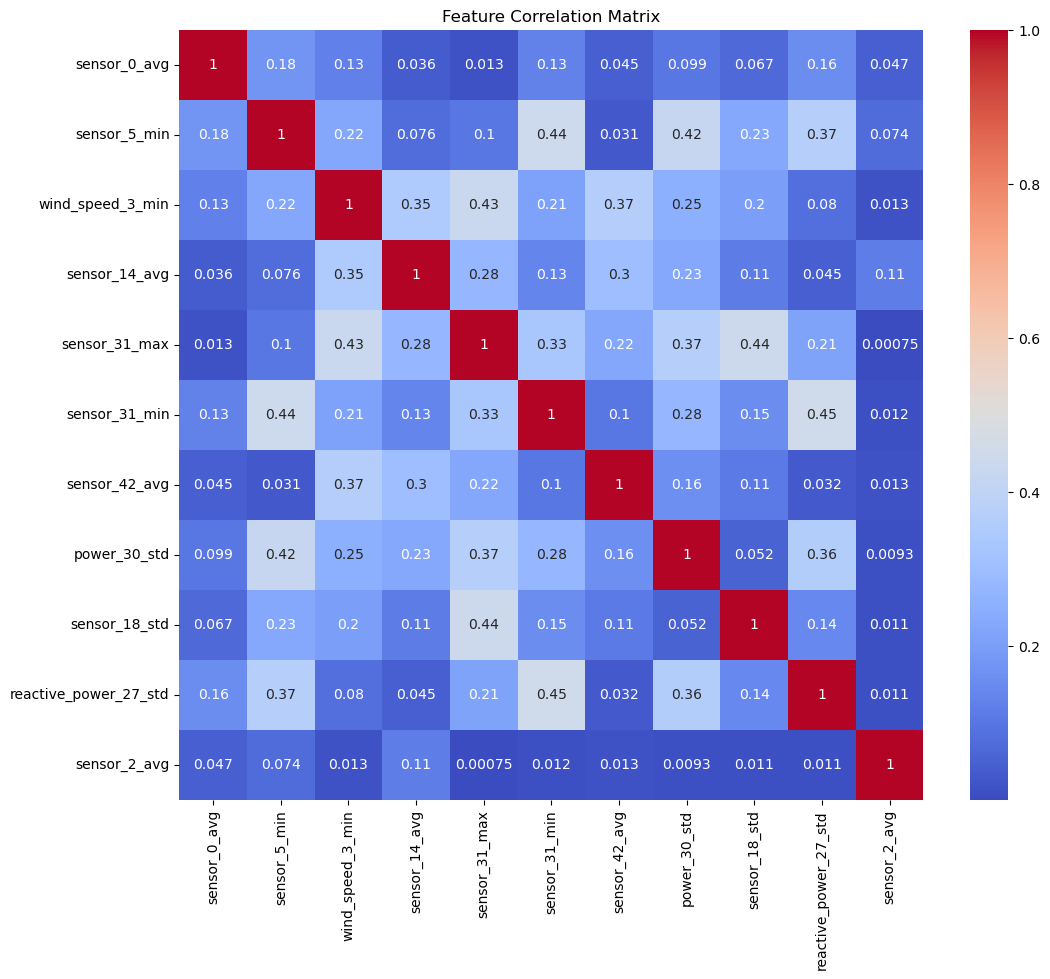

In [232]:
df_corr_calc = X_train_finalset1.copy()

corr_matrix = df_corr_calc.corr().abs()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title("Feature Correlation Matrix")
plt.show()

low correlation heatmap for final feature set 1 shows that after feature engineering, the multicollinearity issue has been effectively addressed, with all pairwise correlations below the 0.6 threshold.

## 4.8 unsupervised Feature Selection PCA

### 4.8.1 PCA Component Selection and Variance Analysis

We use PCA to reduce dimensionality as well as feature selection.
To evaluate the effectiveness of our supervised feature selection pipeline (Section 4.7), we implemented Principal Component Analysis (PCA) as an unsupervised alternative strategy for dimensionality reduction.

Unlike the Lasso-based approach, which selects a subset of interpretable original features, PCA transforms the entire feature space into a new set of orthogonal (uncorrelated) components. We applied PCA to the comprehensive standardized dataset (prior to the quasi-constant and IV-based filtering steps) to capture the global data structure without manual pre-filtering constraints.

This approach serves as a comparative baseline. In the subsequent modeling phase, we will assess whether the interpretable subset selected by Lasso (Feature Set 1) outperforms the information-rich but less interpretable components generated by PCA (Feature Set 2).

In [185]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_train.values), index=X_train.index, columns=X_train.columns)
X.shape

(40474, 80)

In [186]:
pca_X = PCA()

In [189]:
pc_scores = pd.DataFrame(pca_X.fit_transform(X), index=X.index)
pc_scores.head(3)

0         1         2         3         4         5         6   \
52526    1.959241 -1.844983  0.819550 -2.050943  1.596265  1.871354  0.975499   
544569   2.415523 -2.307351 -1.846069 -1.499688  1.213086 -1.387121 -0.042299   
1196712 -5.073096 -4.599482  4.230984  7.949101 -0.407475 -1.172130 -0.634178   

               7         8         9   ...        70        71        72  \
52526    1.014530  1.964571  0.381086  ... -0.009574  0.002719  0.004535   
544569  -1.133512  0.192319  0.113402  ... -0.005874  0.001269 -0.009966   
1196712 -0.240905  2.417895  1.960625  ...  0.007168 -0.030656  0.008796   

               73        74        75        76            77            78  \
52526   -0.003547 -0.003870 -0.005167 -0.000649  7.364661e-07 -5.681621e-10   
544569  -0.000588  0.007854  0.002861  0.000522 -1.177365e-07  4.147976e-09   
1196712 -0.032069  0.007963 -0.000158 -0.008437 -5.331848e-05 -1.211506e-07   

                   79  
52526   -4.387424e-15  
544569  -1.363976e-15  
1196712  3.315991e-14  

[3 rows x 80 columns]

In [190]:
pc_scores.var()

0     4.107201e+01
1     7.581802e+00
2     6.398710e+00
3     3.825566e+00
4     2.551311e+00
          ...     
75    2.387508e-05
76    1.094099e-05
77    6.796753e-11
78    9.186393e-13
79    1.778463e-28
Length: 80, dtype: float64

We use eigenvalue decomposition to compute the principal components. The eigenvalues indicate the amount of variance captured by each principal component, while the eigenvectors define the directions of these components in the feature space.

In [191]:
var_series = pc_scores.var(axis=0)
selected_pc_scores = pc_scores.loc[:, var_series > 1]
selected_pc_scores.var()

0     41.072009
1      7.581802
2      6.398710
3      3.825566
4      2.551311
5      2.081698
6      1.974368
7      1.693801
8      1.362002
9      1.146394
10     1.085352
11     1.001567
dtype: float64

We are supposed to use 12 principal components

### 4.8.2 Visual Analysis of the Feature Space

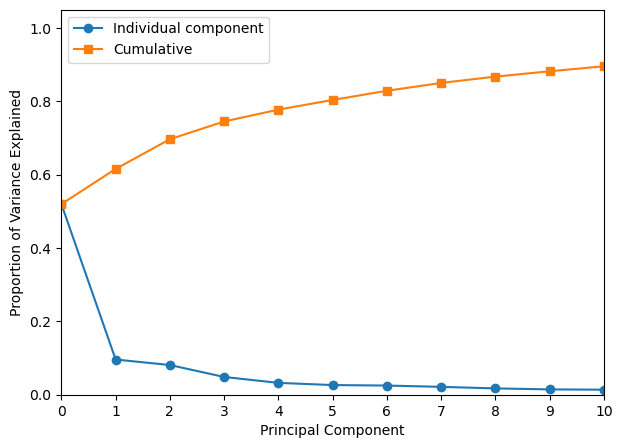

In [192]:
plt.figure(figsize=(7,5))
plt.plot(pca_X.explained_variance_ratio_, '-o', label='Individual component')
plt.plot( np.cumsum(pca_X.explained_variance_ratio_), '-s', label='Cumulative')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.legend(loc=2)

In [ ]:
pca = PCA().fit(X)
print(pca_X.explained_variance_ratio_)
print(len(pca.explained_variance_ratio_[:12]))
sum(pca.explained_variance_ratio_[:12])

[5.19886004e-01 9.59698121e-02 8.09943249e-02 4.84236958e-02
 3.22942772e-02 2.63499563e-02 2.49913821e-02 2.14399836e-02
 1.72401076e-02 1.45109559e-02 1.37382985e-02 1.26777542e-02
 1.21754979e-02 1.01028556e-02 9.42082492e-03 7.71773447e-03
 5.80718685e-03 5.12513983e-03 4.49986399e-03 3.98439203e-03
 3.28912446e-03 2.66165170e-03 2.55685102e-03 2.16258231e-03
 2.12141764e-03 1.79624764e-03 1.64150851e-03 1.48655906e-03
 1.22924372e-03 1.17873700e-03 1.14621939e-03 1.09997295e-03
 1.03775835e-03 8.82852789e-04 8.26538092e-04 7.52943204e-04
 7.01060032e-04 6.34675865e-04 5.23051012e-04 4.61741020e-04
 4.49233710e-04 4.25636294e-04 3.85987423e-04 3.64900586e-04
 3.00848232e-04 2.71366380e-04 2.42662709e-04 2.22823968e-04
 1.97801619e-04 1.83385882e-04 1.64881921e-04 1.50510506e-04
 1.49108142e-04 1.43284565e-04 1.27813308e-04 1.11765902e-04
 9.00117312e-05 8.42964967e-05 7.95690892e-05 6.83385773e-05
 6.12357952e-05 4.71858306e-05 3.42307028e-05 2.93148398e-05
 1.68428261e-05 1.409330

0.9085165522607066

We are ising 12 principal components, which together explain approximately 90.85% of the total variance in the dataset. This selection balances dimensionality reduction with information retention, providing a compact yet informative feature set for subsequent modeling tasks.

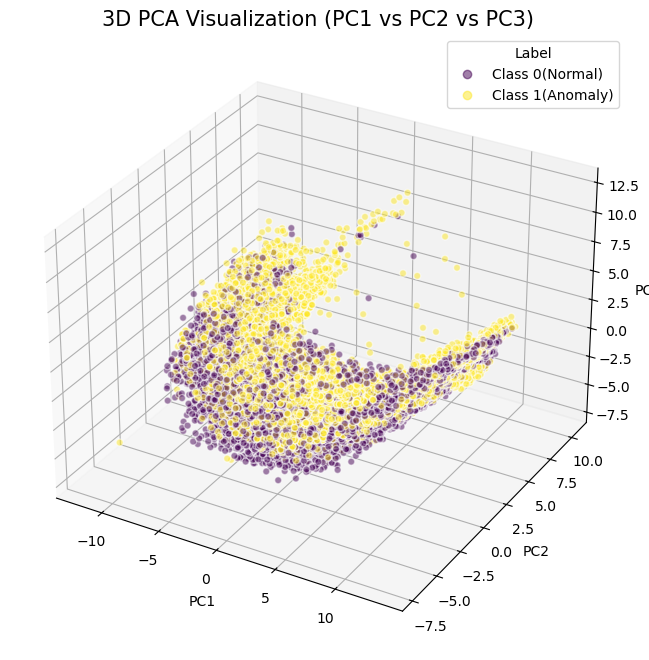

In [209]:
color_labels = y_train
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = pc_scores.iloc[:, 0]
y = pc_scores.iloc[:, 1]
z = pc_scores.iloc[:, 2]

scatter = ax.scatter(x, y, z, 
                     c=color_labels,
                     cmap='viridis',
                     s=25,
                     alpha=0.5,
                     edgecolors='w')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Visualization (PC1 vs PC2 vs PC3)', fontsize=15)

handles, _ = scatter.legend_elements(prop="colors")
legend = ax.legend(handles, ['Class 0(Normal)', 'Class 1(Anomaly)'], 
                   title="Label", 
                   loc="upper right")

plt.show()

To inspect the global structure of the data, we visualized the first three principal components (PC1, PC2, and PC3) in a 3D scatter plot.
The visualization reveals that the data does not form distinct, isolated clusters but rather spans a continuous, non-linear manifold structure. PC1 (X-axis) clearly captures the primary direction of data spread.

### 4.8.3 PCA feature set

In [211]:
scaler = StandardScaler()
# fit for train
X_train_scaled = scaler.fit_transform(X_train)
# transform for test
X_test_scaled = scaler.transform(X_test)

In [212]:
n_components = 12
pca = PCA(n_components=n_components)

In [217]:
# fit for train
X_train_pca_array = pca.fit_transform(X_train_scaled)
# transform for test
X_test_pca_array = pca.transform(X_test_scaled)

In [218]:
pc_columns = [f'PC{i+1}' for i in range(n_components)]

In [221]:
X_train_final_pca = pd.DataFrame(X_train_pca_array, columns=pc_columns, index=X_train.index)
X_test_final_pca = pd.DataFrame(X_test_pca_array, columns=pc_columns, index=X_test.index)
X_train_final_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
52526    1.959241 -1.844983  0.819550 -2.050943  1.596265  1.871354  0.975499   
544569   2.415523 -2.307351 -1.846069 -1.499688  1.213086 -1.387121 -0.042299   
1196712 -5.073096 -4.599482  4.230984  7.949101 -0.407475 -1.172130 -0.634178   
761900  -1.472215 -2.757431  1.566224  0.678119 -2.716222  2.665685  0.270667   
218049  -1.167439 -1.719579  8.490628  2.570357 -0.080752  1.866181  0.668809   

              PC8       PC9      PC10      PC11      PC12  
52526    1.014530  1.964571  0.381086  0.064222  0.004690  
544569  -1.133512  0.192319  0.113402 -0.521858  0.049811  
1196712 -0.240905  2.417895  1.960625  0.246750  0.456827  
761900   1.740627 -0.023843 -0.839516 -1.209472 -0.432558  
218049  -3.685129 -0.885350  0.356345 -0.091643  0.113179

# 5.   Model Training & Evaluation

Then we will use these two feature sets to train our models and compare their performance.

**feature set with PCA components**\
`X_train_final_pca`\
`X_test_final_pca`\
`y_train`\
`y_test`

**feature set with set1 features**\
`X_train_finalset1`\
`X_test_finalset1`\
`y_train`\
`y_test`

In [228]:
# feature set with PCA components
X_train_final_pca
X_test_final_pca
y_train
y_test

# feature set with set1 features
X_train_finalset1
X_test_finalset1
y_train
y_test

870923     0
489902     0
108442     1
869683     0
1031666    0
          ..
1033692    0
978358     0
108785     1
326978     1
651979     0
Name: event_label, Length: 10119, dtype: int64

**Classifier Choices**\
The dataset is about binary classification, and logistic regression performs well on such problems.\
Therefore, we first choose logistic regression. Secondly, random forest has consistently shown good performance in the field of machine learning and is very popular. So, our Classifier Choices are logistic regression and random forest.\
**Performance Metrics**\
We will choose 2-3 metrics to predict the effectiveness and accuracy of these two models. We will use\
Accuracy, Area Under the ROC curve, AUC is usually. Also,we can check the Kolmogorov-Smirnov statistic.